In [93]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import sklearn
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import Lasso,Ridge,ElasticNet
from scipy.stats import zscore
from sklearn.model_selection import GridSearchCV

In [94]:
df=pd.read_csv('https://raw.githubusercontent.com/FlipRoboTechnologies/ML_-Datasets/main/Baseball/baseball.csv')
df

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86
5,93,891,5509,1480,308,17,232,570,1151,88,670,609,3.80,7,10,34,88
6,87,764,5567,1397,272,19,212,554,1227,63,698,652,4.03,3,4,48,93
7,81,713,5485,1370,246,20,217,418,1331,44,693,646,4.05,0,10,43,77
8,80,644,5485,1383,278,32,167,436,1310,87,642,604,3.74,1,12,60,95
9,78,748,5640,1495,294,33,161,478,1148,71,753,694,4.31,3,10,40,97


In [95]:
df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


this are the first 5 rows of the dataset

In [96]:
df.tail()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
25,92,667,5385,1346,263,26,187,563,1258,59,595,553,3.44,6,21,47,75
26,84,696,5565,1486,288,39,136,457,1159,93,627,597,3.72,7,18,41,78
27,79,720,5649,1494,289,48,154,490,1312,132,713,659,4.04,1,12,44,86
28,74,650,5457,1324,260,36,148,426,1327,82,731,655,4.09,1,6,41,92
29,68,737,5572,1479,274,49,186,388,1283,97,844,799,5.04,4,4,36,95


this are the last 5 rows of the dataset

In [97]:
df.sample(5)

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
26,84,696,5565,1486,288,39,136,457,1159,93,627,597,3.72,7,18,41,78
28,74,650,5457,1324,260,36,148,426,1327,82,731,655,4.09,1,6,41,92
27,79,720,5649,1494,289,48,154,490,1312,132,713,659,4.04,1,12,44,86
15,100,647,5484,1386,288,39,137,506,1267,69,525,478,2.94,1,15,62,96


this are the random samples collected from the dataset

In [98]:
df.shape

(30, 17)

this dataset contains 30 rows and the 17 columns out of that column 1 ('W') is our target variable

In [99]:
df.columns.to_list()

['W',
 'R',
 'AB',
 'H',
 '2B',
 '3B',
 'HR',
 'BB',
 'SO',
 'SB',
 'RA',
 'ER',
 'ERA',
 'CG',
 'SHO',
 'SV',
 'E']

this are the feature names of the dataset

In [100]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 17 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   W       30 non-null     int64  
 1   R       30 non-null     int64  
 2   AB      30 non-null     int64  
 3   H       30 non-null     int64  
 4   2B      30 non-null     int64  
 5   3B      30 non-null     int64  
 6   HR      30 non-null     int64  
 7   BB      30 non-null     int64  
 8   SO      30 non-null     int64  
 9   SB      30 non-null     int64  
 10  RA      30 non-null     int64  
 11  ER      30 non-null     int64  
 12  ERA     30 non-null     float64
 13  CG      30 non-null     int64  
 14  SHO     30 non-null     int64  
 15  SV      30 non-null     int64  
 16  E       30 non-null     int64  
dtypes: float64(1), int64(16)
memory usage: 4.1 KB


in this dataset 1 column is ('float64') and the remaining 16 columns are ('int64')

In [101]:
df.dtypes

W        int64
R        int64
AB       int64
H        int64
2B       int64
3B       int64
HR       int64
BB       int64
SO       int64
SB       int64
RA       int64
ER       int64
ERA    float64
CG       int64
SHO      int64
SV       int64
E        int64
dtype: object

this are the features datatype

In [102]:
df.isnull().sum()

W      0
R      0
AB     0
H      0
2B     0
3B     0
HR     0
BB     0
SO     0
SB     0
RA     0
ER     0
ERA    0
CG     0
SHO    0
SV     0
E      0
dtype: int64

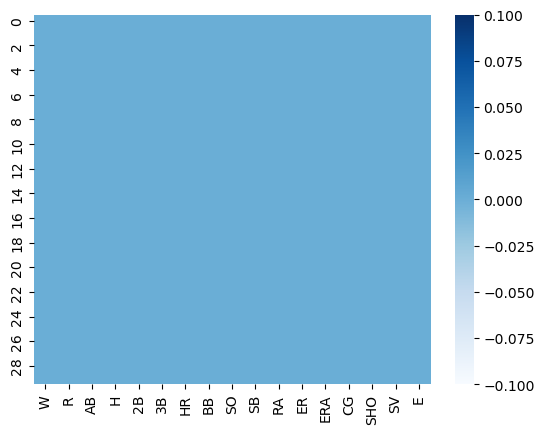

In [103]:
sns.heatmap(df.isnull(),cmap='Blues')
plt.show()

as we can see in this dataset we do not have the null values

In [104]:
for i in df.columns:
    print(df[i].value_counts())
    print('\n')

68     3
81     2
76     2
74     2
83     2
98     1
84     1
92     1
63     1
67     1
71     1
90     1
64     1
97     1
95     1
100    1
85     1
86     1
88     1
78     1
80     1
87     1
93     1
79     1
Name: W, dtype: int64


689    2
696    2
724    1
647    1
650    1
720    1
667    1
626    1
573    1
613    1
703    1
683    1
640    1
655    1
697    1
694    1
656    1
661    1
729    1
751    1
748    1
644    1
713    1
764    1
891    1
622    1
669    1
737    1
Name: R, dtype: int64


5485    2
5575    1
5631    1
5457    1
5649    1
5565    1
5385    1
5529    1
5420    1
5463    1
5428    1
5527    1
5571    1
5480    1
5491    1
5484    1
5467    1
5600    1
5544    1
5417    1
5459    1
5511    1
5640    1
5567    1
5509    1
5605    1
5533    1
5439    1
5572    1
Name: AB, dtype: int64


1363    2
1497    1
1386    1
1324    1
1494    1
1486    1
1346    1
1374    1
1361    1
1420    1
1351    1
1382    1
1378    1
1341    1
1462    1
1405    1
1349    1

In [105]:
df.nunique().to_frame('no of unique values')

,no of unique values
W,24
R,28
AB,29
H,29
2B,22
3B,23
HR,27
BB,29
SO,29
SB,27


in all the features there is not that much repetation of the data we are more having continues values  accept ('cg') feature 

In [106]:
df.describe()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.00000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,80.966667,688.233333,5516.266667,1403.533333,274.733333,31.300000,163.633333,469.100000,1248.20000,83.500000,688.233333,635.833333,3.956333,3.466667,11.300000,43.066667,94.333333
std,10.453455,58.761754,70.467372,57.140923,18.095405,10.452355,31.823309,57.053725,103.75947,22.815225,72.108005,70.140786,0.454089,2.763473,4.120177,7.869335,13.958889
min,63.000000,573.000000,5385.000000,1324.000000,236.000000,13.000000,100.000000,375.000000,973.00000,44.000000,525.000000,478.000000,2.940000,0.000000,4.000000,28.000000,75.000000
25%,74.000000,651.250000,5464.000000,1363.000000,262.250000,23.000000,140.250000,428.250000,1157.50000,69.000000,636.250000,587.250000,3.682500,1.000000,9.000000,37.250000,86.000000
50%,81.000000,689.000000,5510.000000,1382.500000,275.500000,31.000000,158.500000,473.000000,1261.50000,83.500000,695.500000,644.500000,4.025000,3.000000,12.000000,42.000000,91.000000
75%,87.750000,718.250000,5570.000000,1451.500000,288.750000,39.000000,177.000000,501.250000,1311.50000,96.500000,732.500000,679.250000,4.220000,5.750000,13.000000,46.750000,96.750000
max,100.000000,891.000000,5649.000000,1515.000000,308.000000,49.000000,232.000000,570.000000,1518.00000,134.000000,844.000000,799.000000,5.040000,11.000000,21.000000,62.000000,126.000000


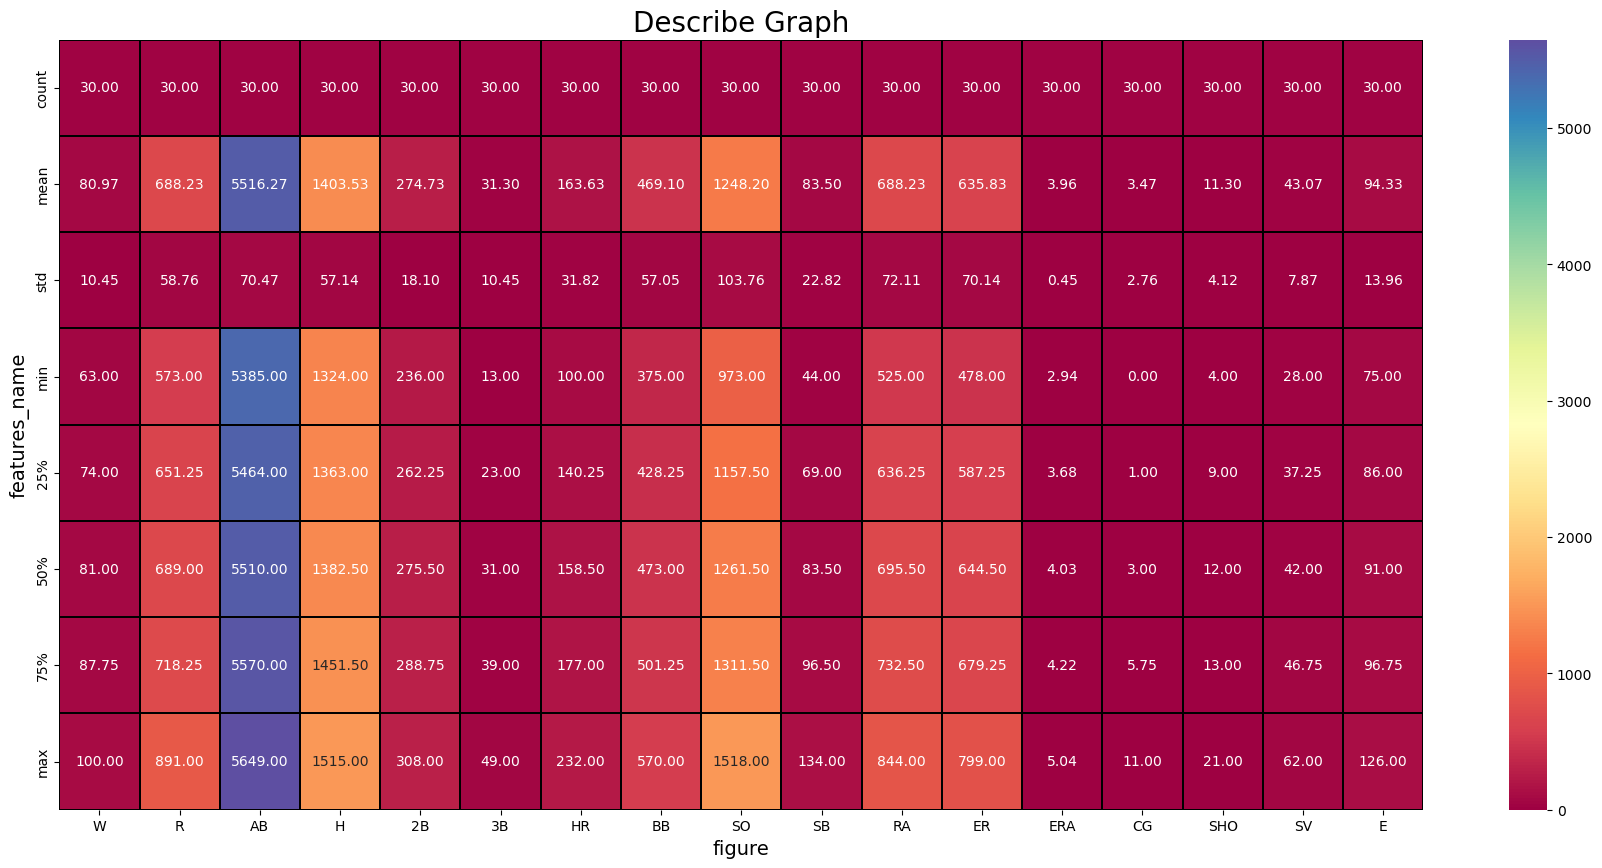

In [107]:
plt.figure(figsize=(22,10))
sns.heatmap(df.describe(),annot=True,fmt='0.2f',linewidth=0.2,linecolor='black',cmap='Spectral')
plt.xlabel('figure',fontsize=14)
plt.ylabel('features_name',fontsize=14)
plt.title('Describe Graph',fontsize=20)
plt.show()

as we can see there is  bit difference between the features mean value and the median(50%) value  

in the features 'AB'('At bat or time at bat'),'H' ('base hit ') ,'HR'('HOME RUNS'),E('Error') mean value is high than median('50%') percentile value

in the features BB('walk'),'SO'('K strike out'), 'RA'('Run Average'),'ER'('Earned Run'),'ERA'('Earned Run Average'),'CG'('Complete Game') mean value is less than the median(50%) value

and also we have some differences between the (75%) percentile and the maximum(100%) value

# Data Analysis

univariate 

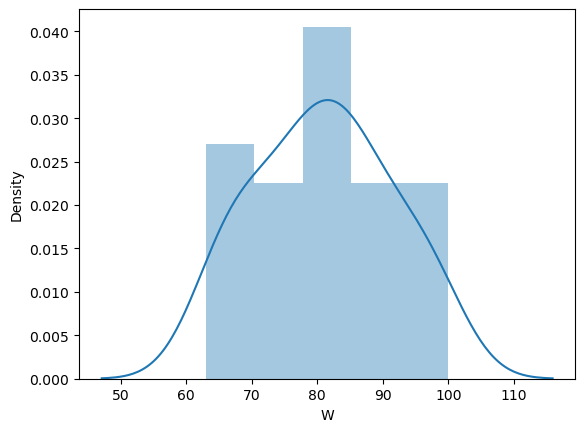

80.96666666666667
81.0
81.0


In [108]:
sns.distplot(df['W'])
plt.show()
print(df['W'].mean())
print(df['W'].median())
print(df['W'].quantile(.50))

this ('W') wins column is normally distributed as we can see the mean,median,'50%' values are almost same.

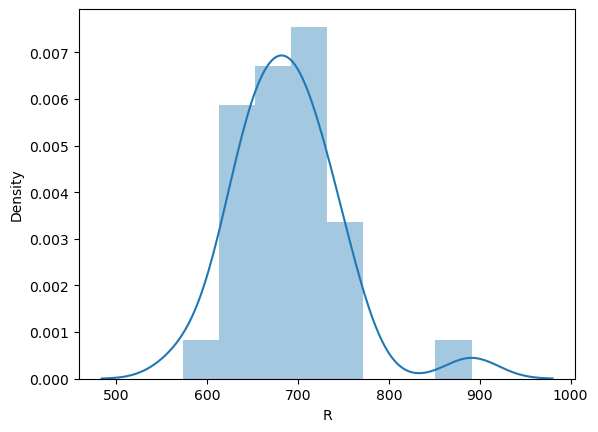

688.2333333333333
689.0
689.0


In [109]:
sns.distplot(df['R'])
plt.show()
print(df['R'].mean())
print(df['R'].median())
print(df['R'].quantile(.50))

this feature 'R'('Runs Scored') is also normally distributed because mean,median,50% value is almost same 

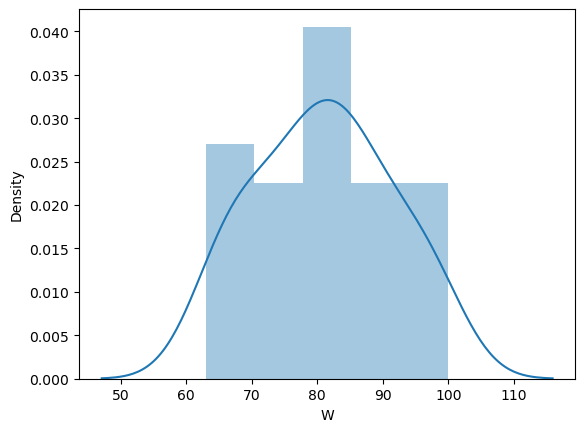

80.96666666666667
81.0
81.0


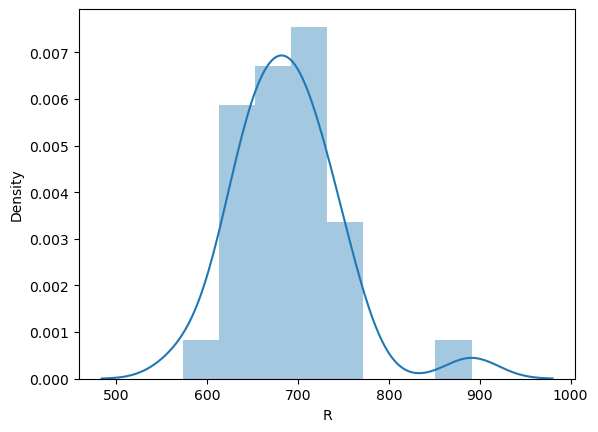

688.2333333333333
689.0
689.0


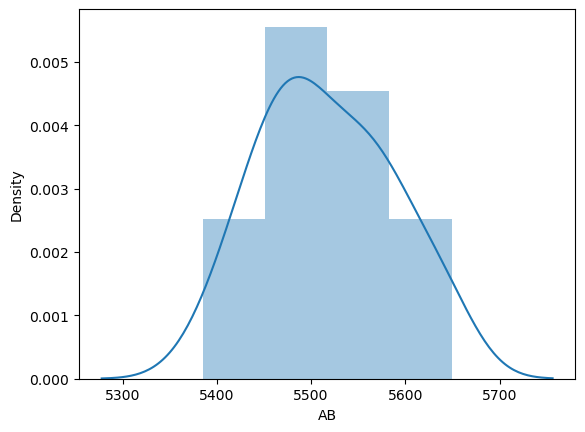

5516.266666666666
5510.0
5510.0


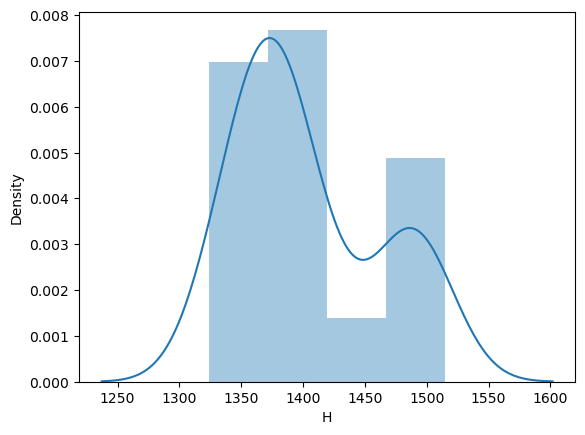

1403.5333333333333
1382.5
1382.5


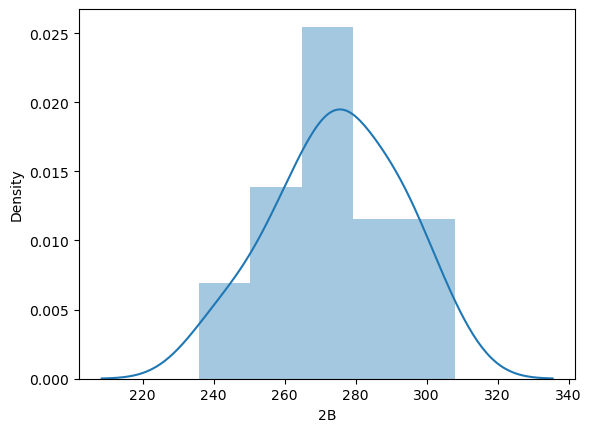

274.73333333333335
275.5
275.5


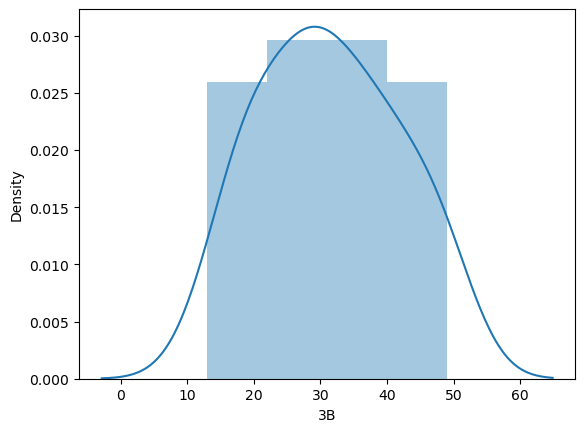

31.3
31.0
31.0


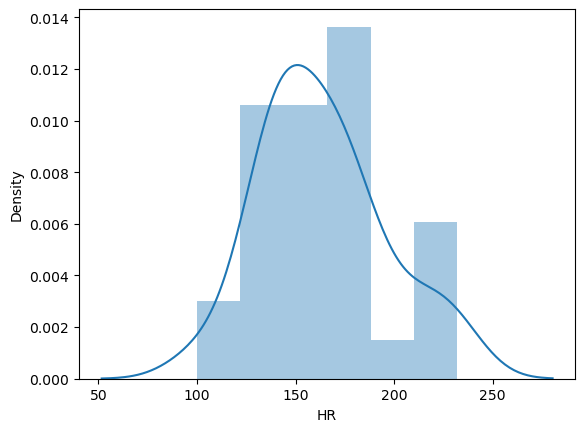

163.63333333333333
158.5
158.5


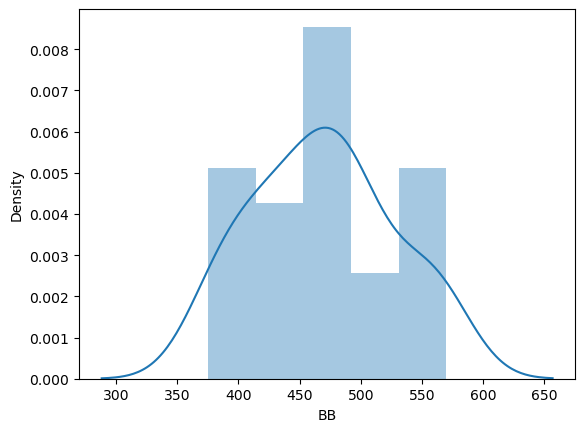

469.1
473.0
473.0


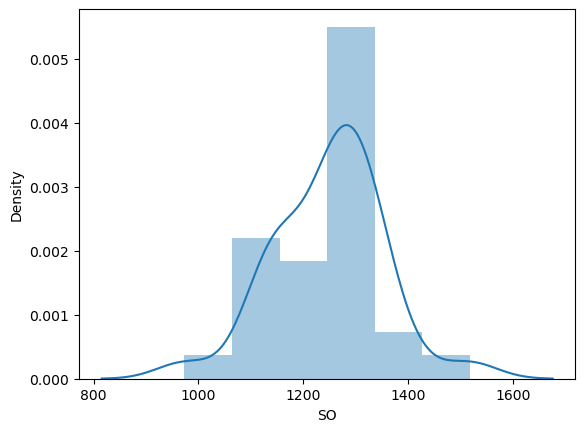

1248.2
1261.5
1261.5


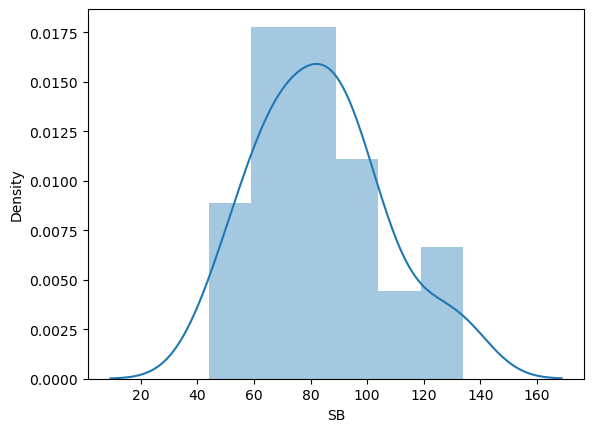

83.5
83.5
83.5


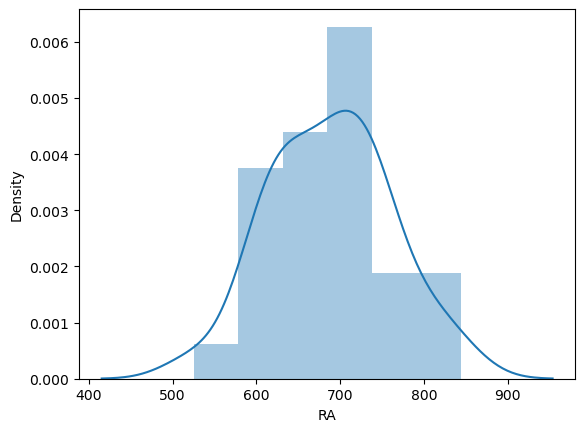

688.2333333333333
695.5
695.5


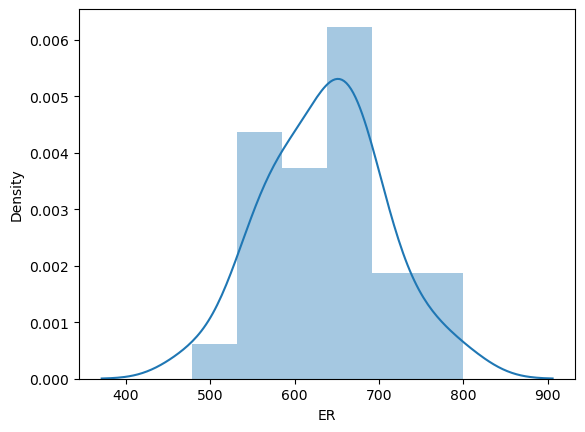

635.8333333333334
644.5
644.5


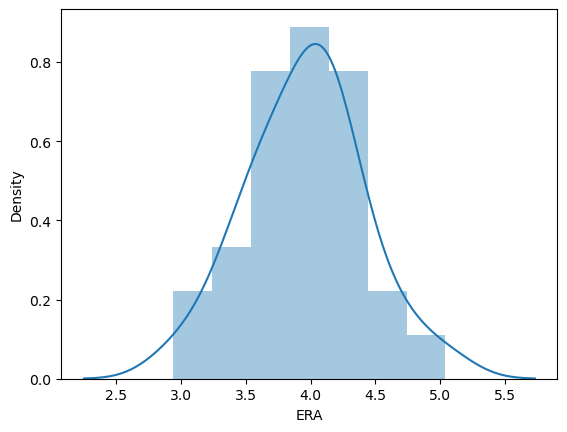

3.9563333333333333
4.025
4.025


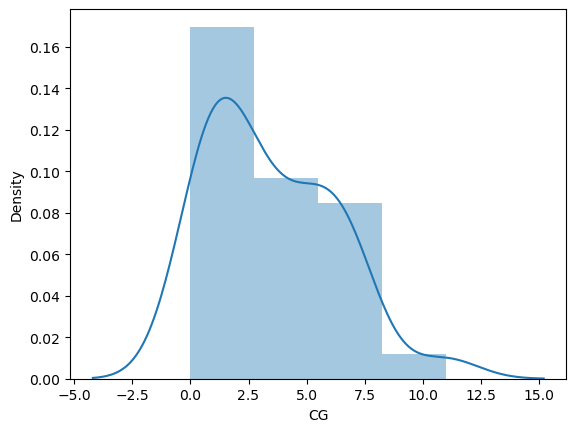

3.466666666666667
3.0
3.0


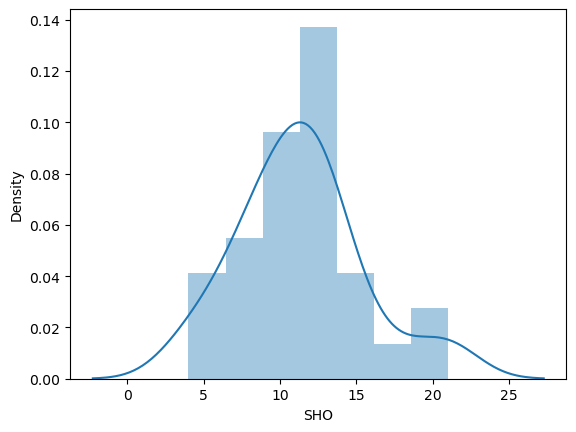

11.3
12.0
12.0


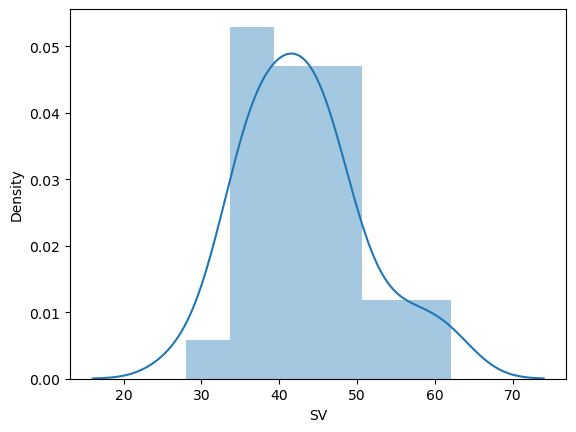

43.06666666666667
42.0
42.0


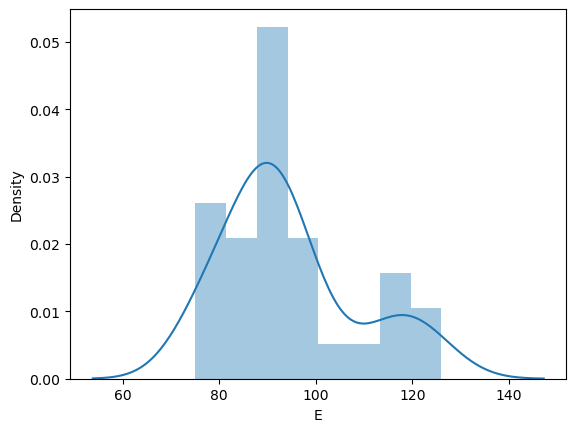

94.33333333333333
91.0
91.0


In [110]:
for i in df.columns:
    sns.distplot(df[i])
    plt.show()
    print(df[i].mean())
    print(df[i].median())
    print(df[i].quantile(.50))

as we can see in the above distributions plot all the features are almost normally distributed

Bivariate Analysis

In [111]:
df.head()

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,95,724,5575,1497,300,42,139,383,973,104,641,601,3.73,2,8,56,88
1,83,696,5467,1349,277,44,156,439,1264,70,700,653,4.07,2,12,45,86
2,81,669,5439,1395,303,29,141,533,1157,86,640,584,3.67,11,10,38,79
3,76,622,5533,1381,260,27,136,404,1231,68,701,643,3.98,7,9,37,101
4,74,689,5605,1515,289,49,151,455,1259,83,803,746,4.64,7,12,35,86


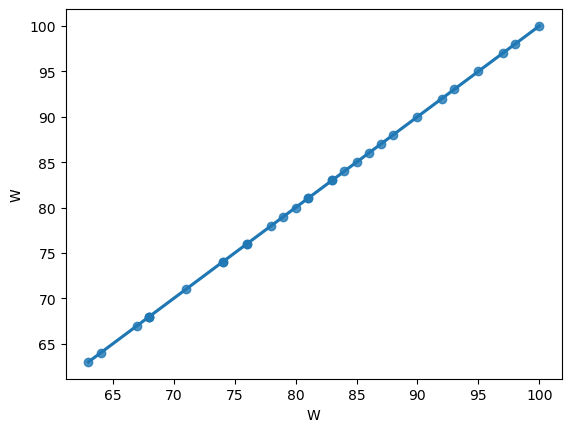

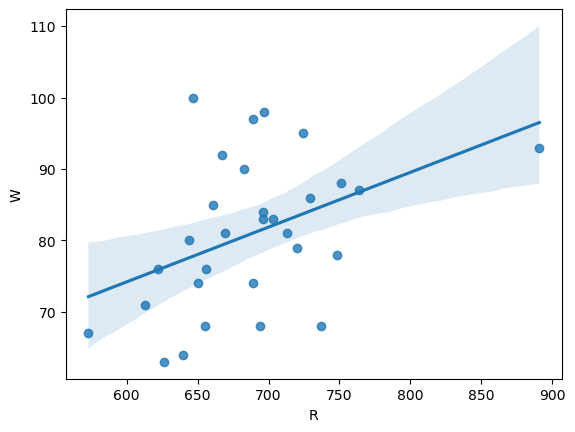

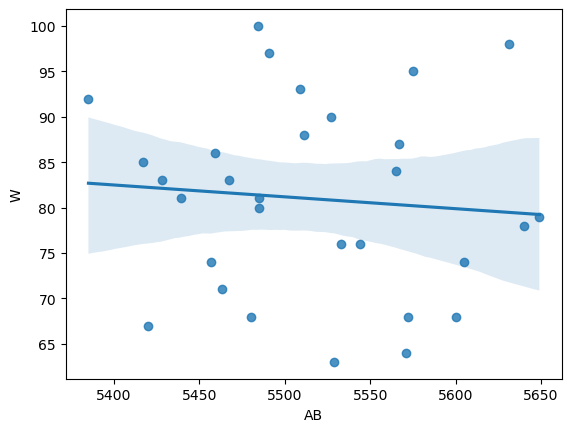

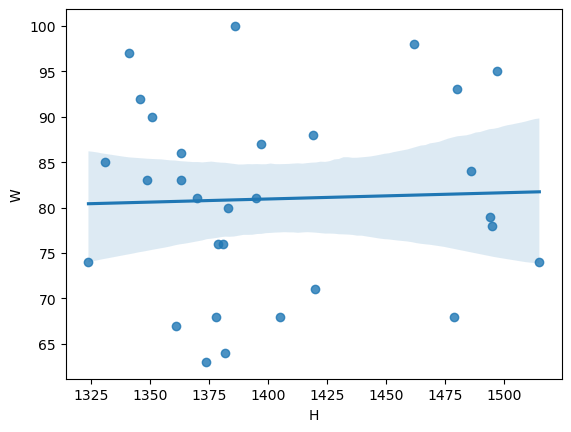

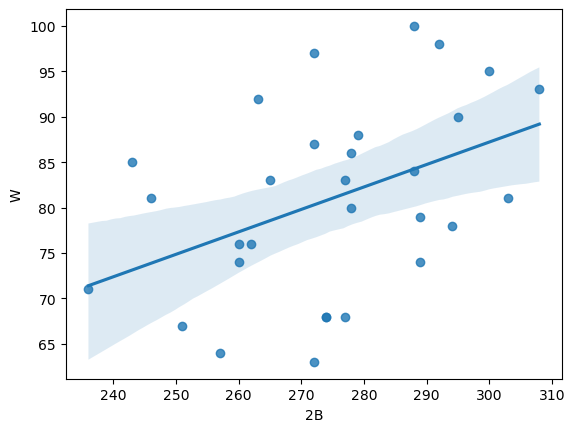

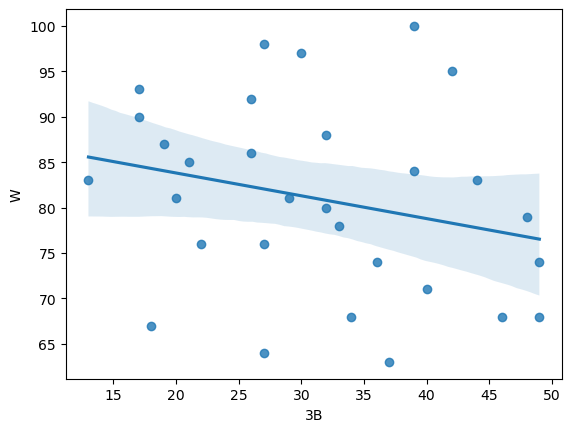

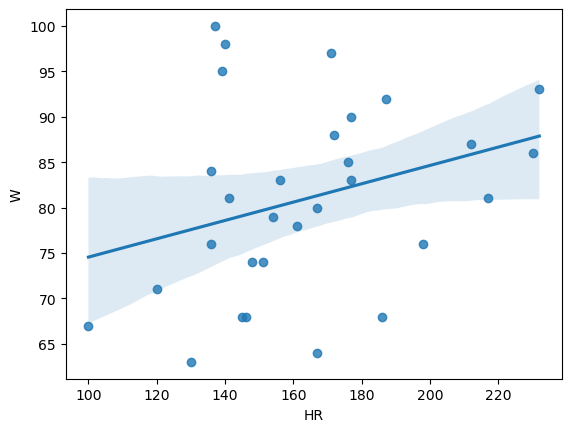

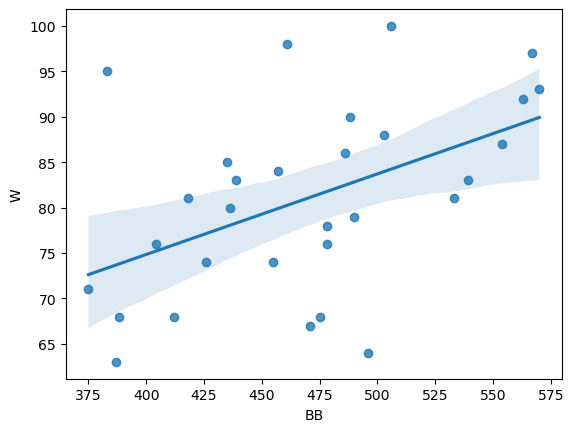

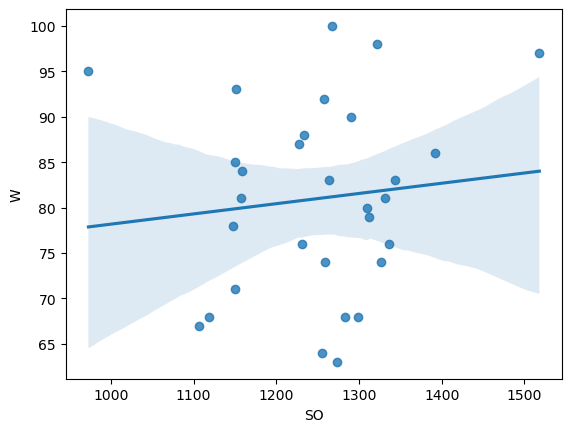

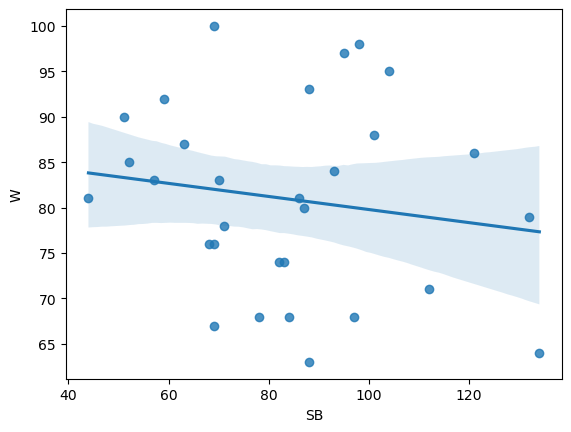

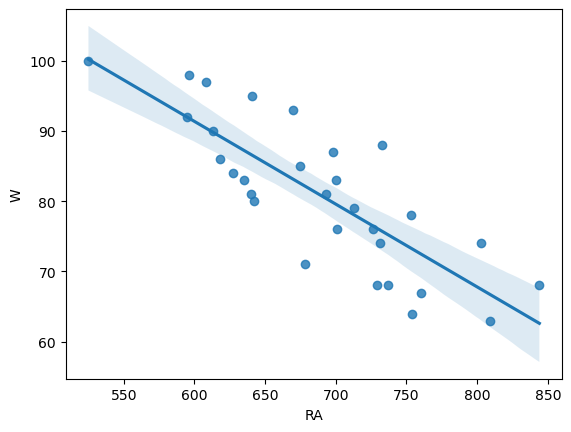

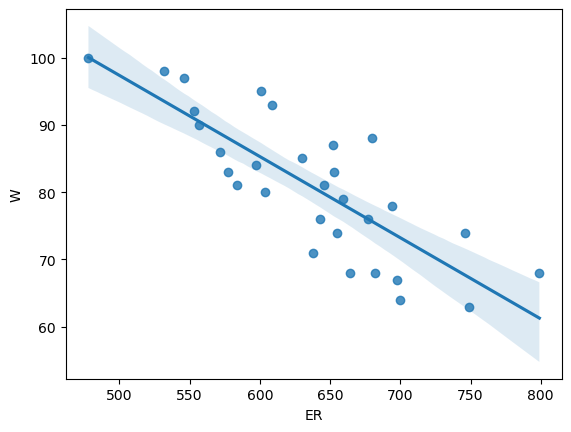

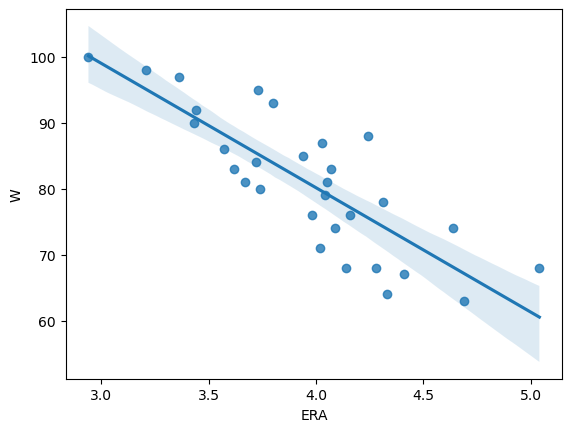

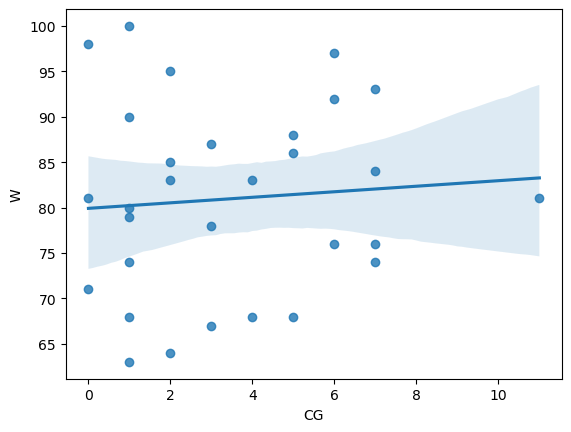

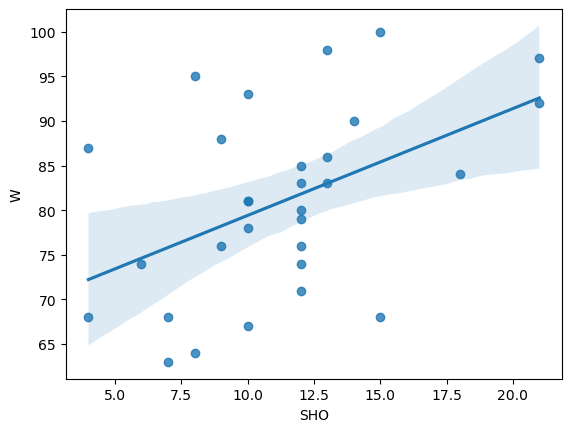

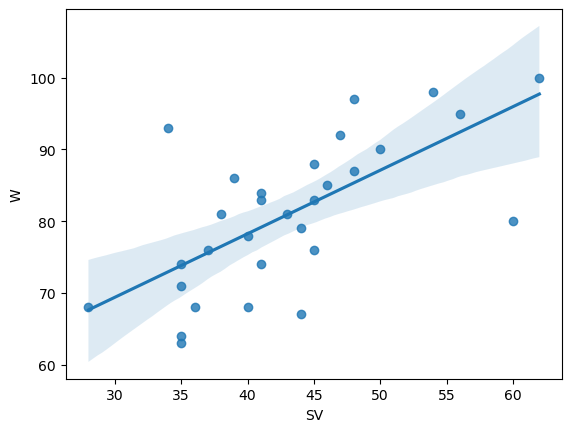

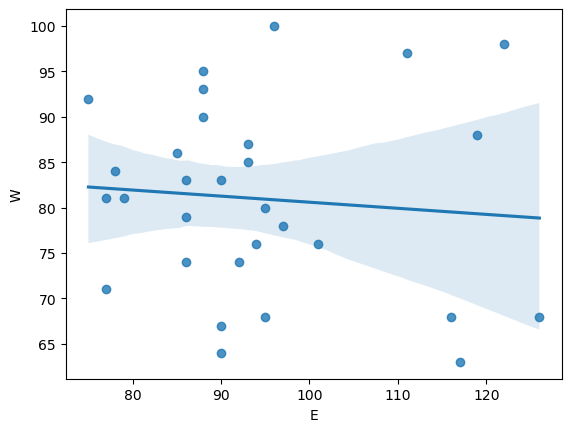

In [112]:
for i in df.columns:
    sns.regplot(x=i,y='W',data=df)
    plt.show()

the features are not that much correlated with the target variable ('W')

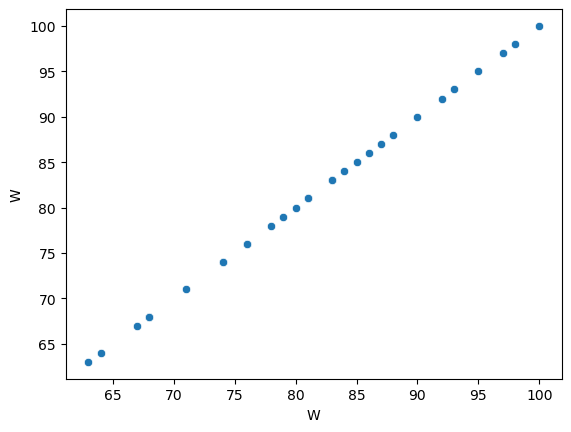

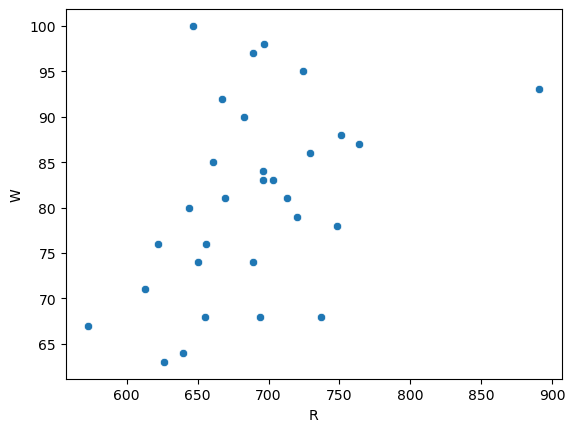

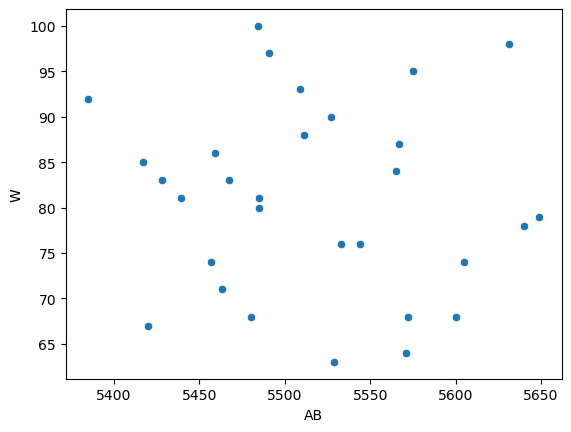

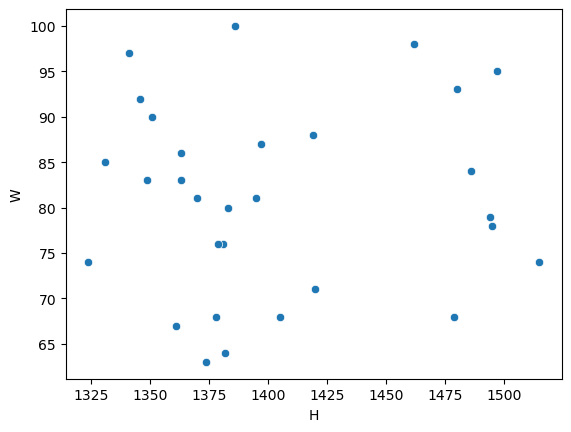

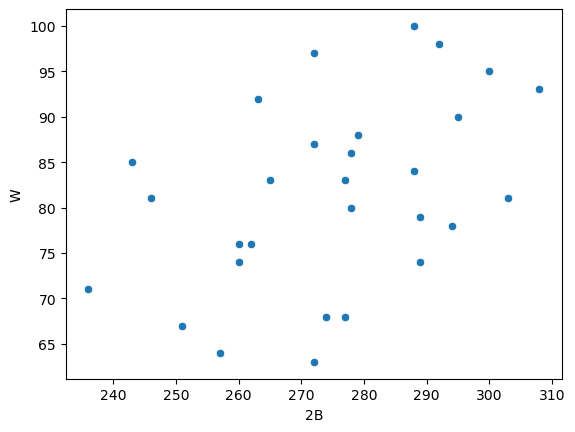

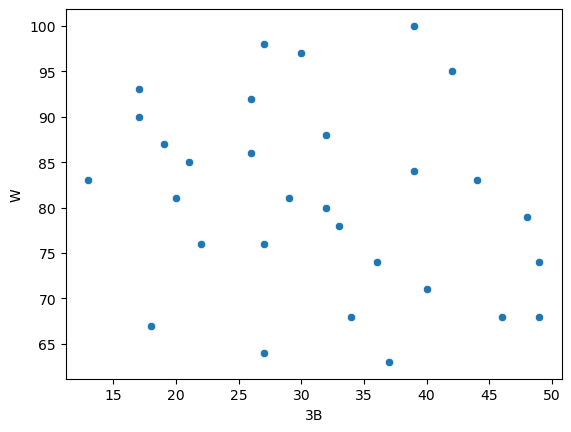

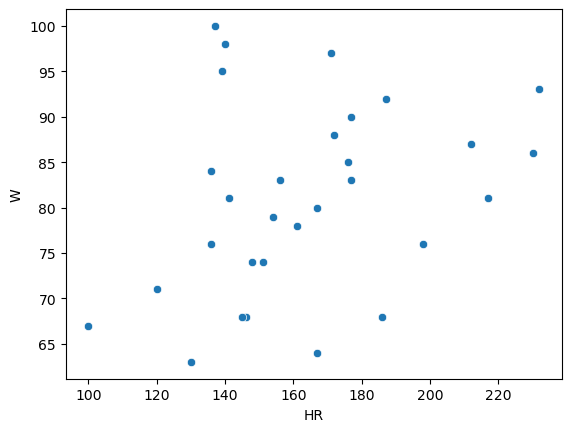

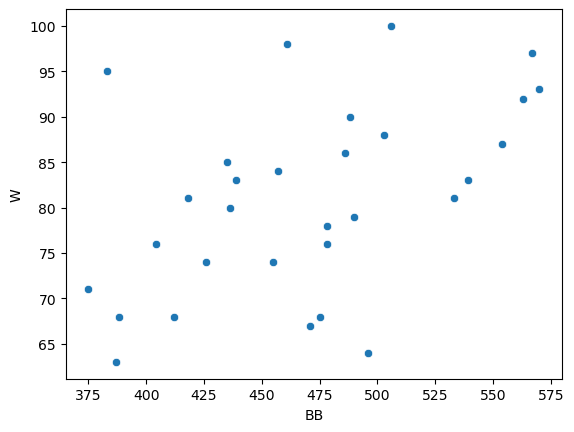

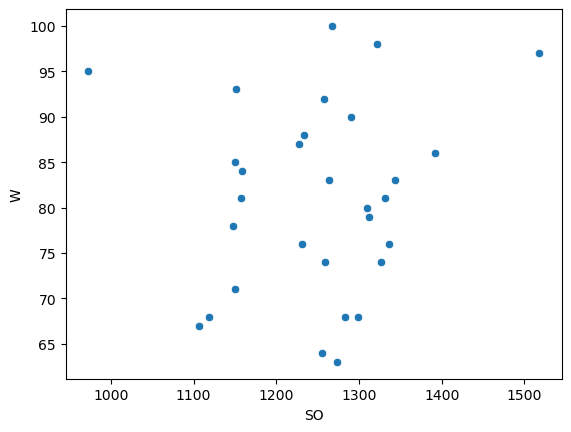

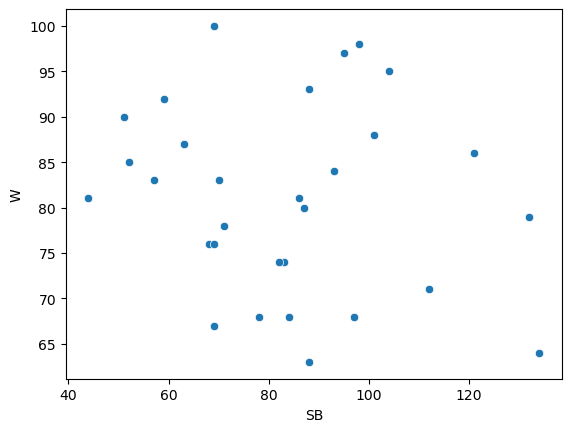

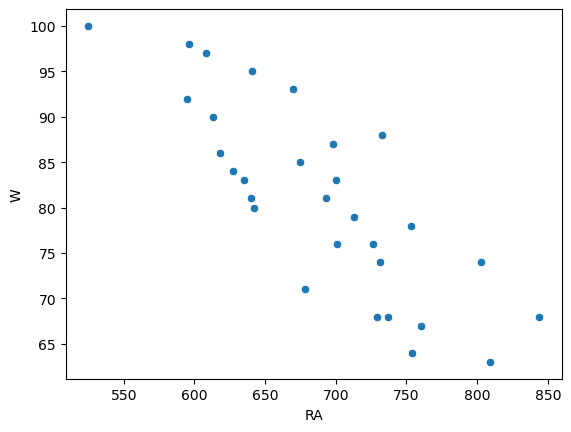

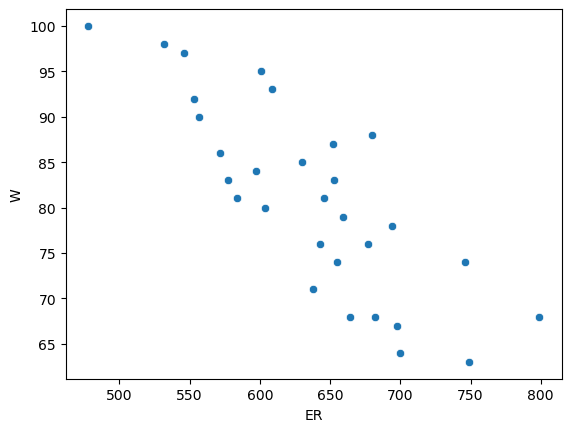

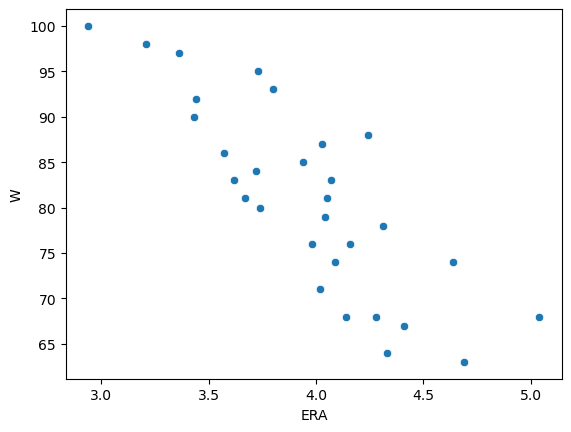

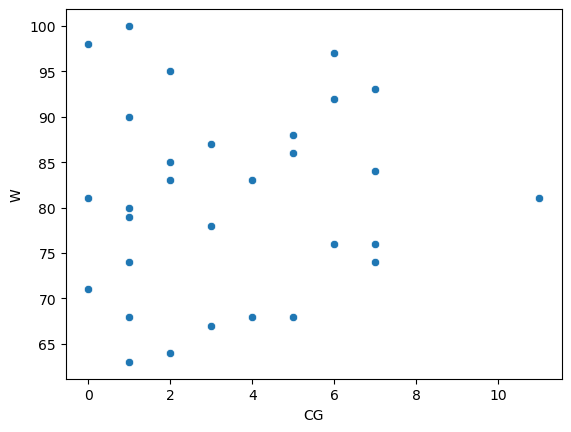

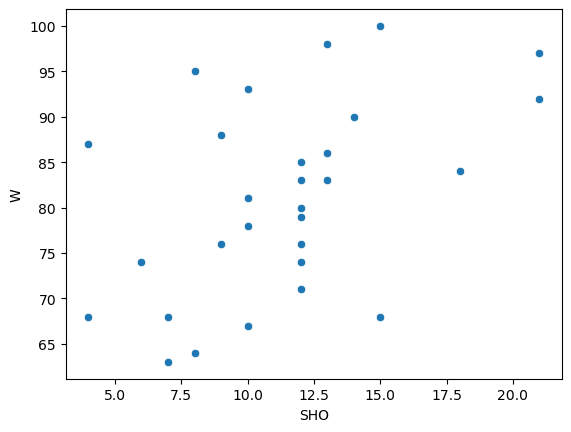

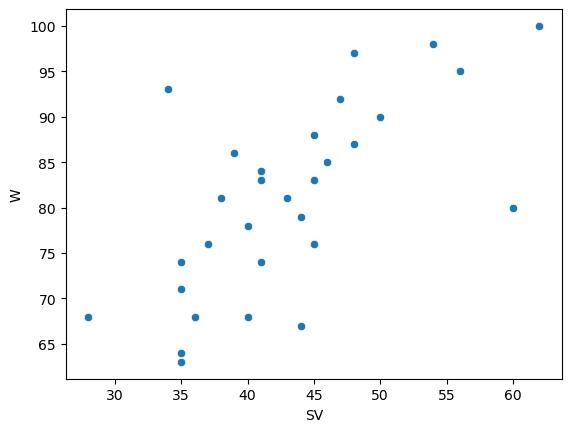

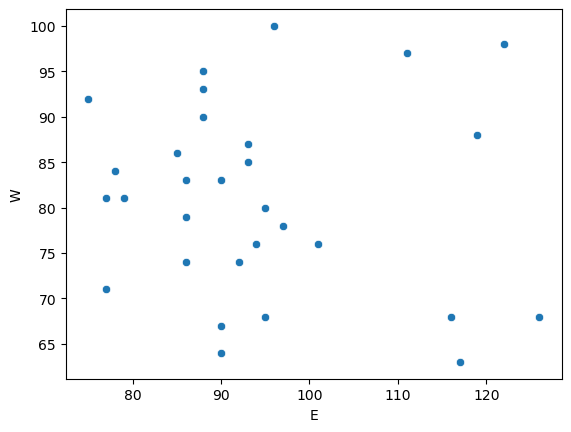

In [113]:
for i in df.columns:
    sns.scatterplot(x=i,y='W',data=df)
    plt.show()

in the scatterplot we can see the features are not that much correlated with the target variable

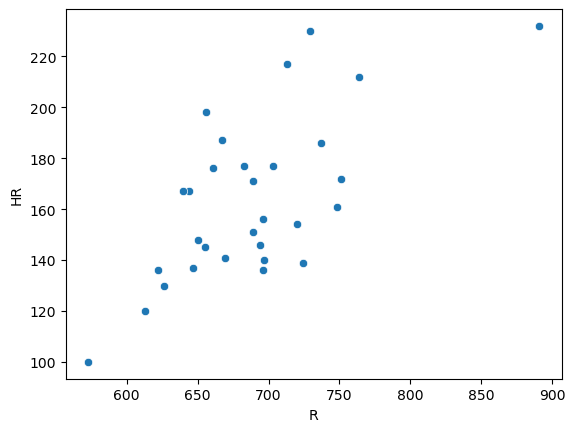

In [114]:
sns.scatterplot(x='R',y='HR',data=df)
plt.show()

the feature 'R'('Run Scored') and the feature 'HR'('Home Runs') are possitively correlated

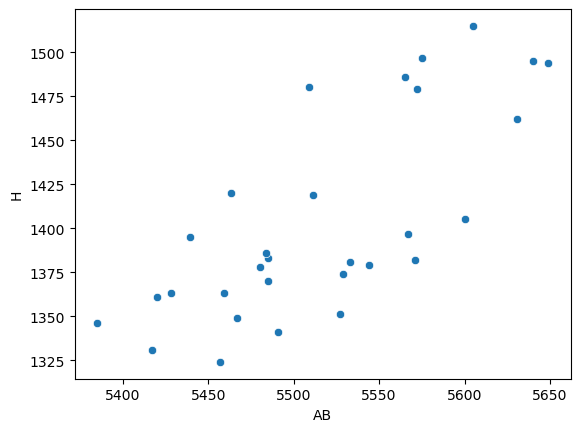

In [115]:
sns.scatterplot(x='AB',y='H',data=df)
plt.show()


the feature 'AB' and the feature 'H' both are positively correlated 

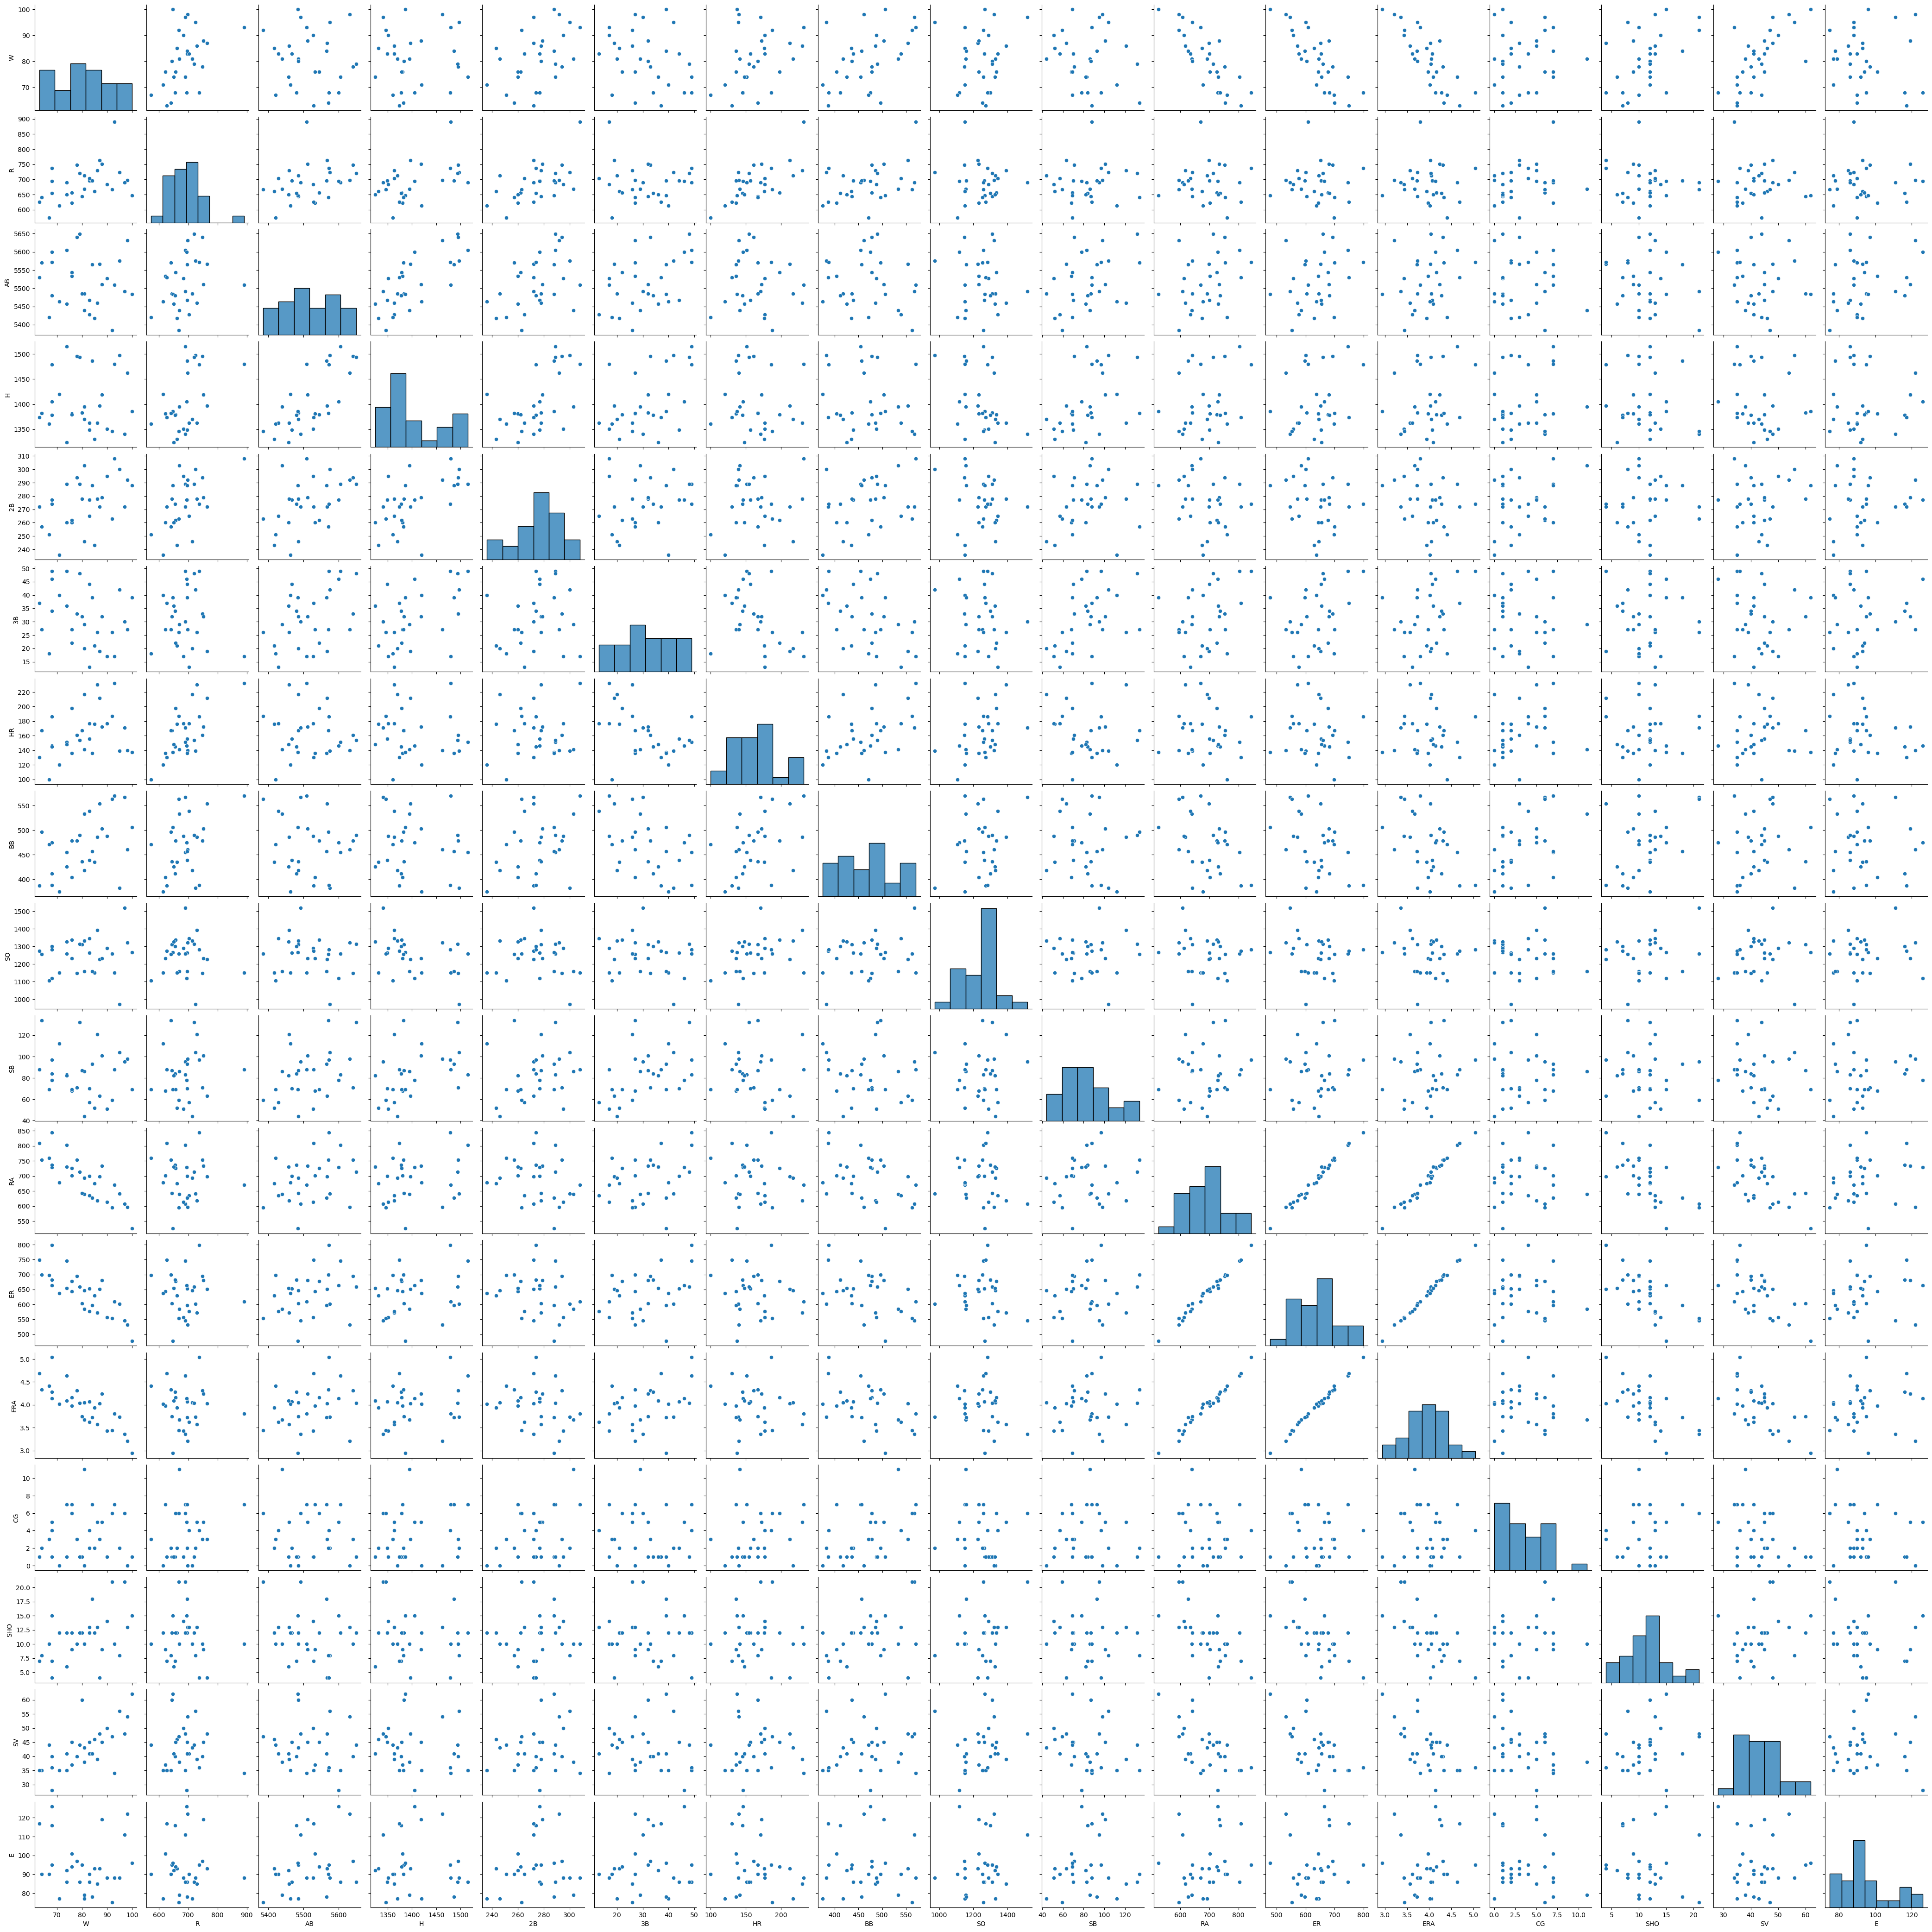

In [116]:
sns.pairplot(df)
plt.show()

In [117]:
corr=df.corr()
corr

,W,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
W,1.000000,0.430751,-0.087947,0.037612,0.427797,-0.251118,0.307407,0.484342,0.111850,-0.157234,-0.812952,-0.809435,-0.819600,0.080533,0.471805,0.666530,-0.089485
R,0.430751,1.000000,0.319464,0.482856,0.560084,-0.070072,0.671283,0.402452,-0.054726,0.081367,-0.041623,-0.041245,-0.049281,0.232042,-0.103274,-0.096380,-0.023262
AB,-0.087947,0.319464,1.000000,0.739122,0.453370,0.435422,-0.066983,-0.136414,-0.106022,0.372618,0.316010,0.309686,0.255551,-0.080876,-0.197321,-0.106367,0.316743
H,0.037612,0.482856,0.739122,1.000000,0.566847,0.478694,-0.090855,-0.118281,-0.398830,0.413444,0.224324,0.252489,0.231172,0.147955,-0.145559,-0.130371,-0.033173
2B,0.427797,0.560084,0.453370,0.566847,1.000000,0.220490,0.056292,0.302700,-0.150752,0.195027,-0.218160,-0.235531,-0.254854,0.306675,0.057998,0.171576,0.105754
3B,-0.251118,-0.070072,0.435422,0.478694,0.220490,1.000000,-0.430915,-0.454949,-0.141196,0.457437,0.314125,0.340225,0.330951,-0.065898,-0.041396,-0.142370,0.126678
HR,0.307407,0.671283,-0.066983,-0.090855,0.056292,-0.430915,1.000000,0.425691,0.359923,-0.136567,-0.103903,-0.085922,-0.090917,0.156502,-0.019119,-0.028540,-0.207597
BB,0.484342,0.402452,-0.136414,-0.118281,0.302700,-0.454949,0.425691,1.000000,0.233652,-0.098347,-0.416445,-0.452663,-0.459832,0.462478,0.426004,0.099445,-0.075685
SO,0.111850,-0.054726,-0.106022,-0.398830,-0.150752,-0.141196,0.359923,0.233652,1.000000,0.030968,-0.129745,-0.161612,-0.180368,-0.093418,0.237721,0.126297,0.155133
SB,-0.157234,0.081367,0.372618,0.413444,0.195027,0.457437,-0.136567,-0.098347,0.030968,1.000000,0.132290,0.143068,0.126063,-0.020783,-0.106563,-0.183418,0.079149


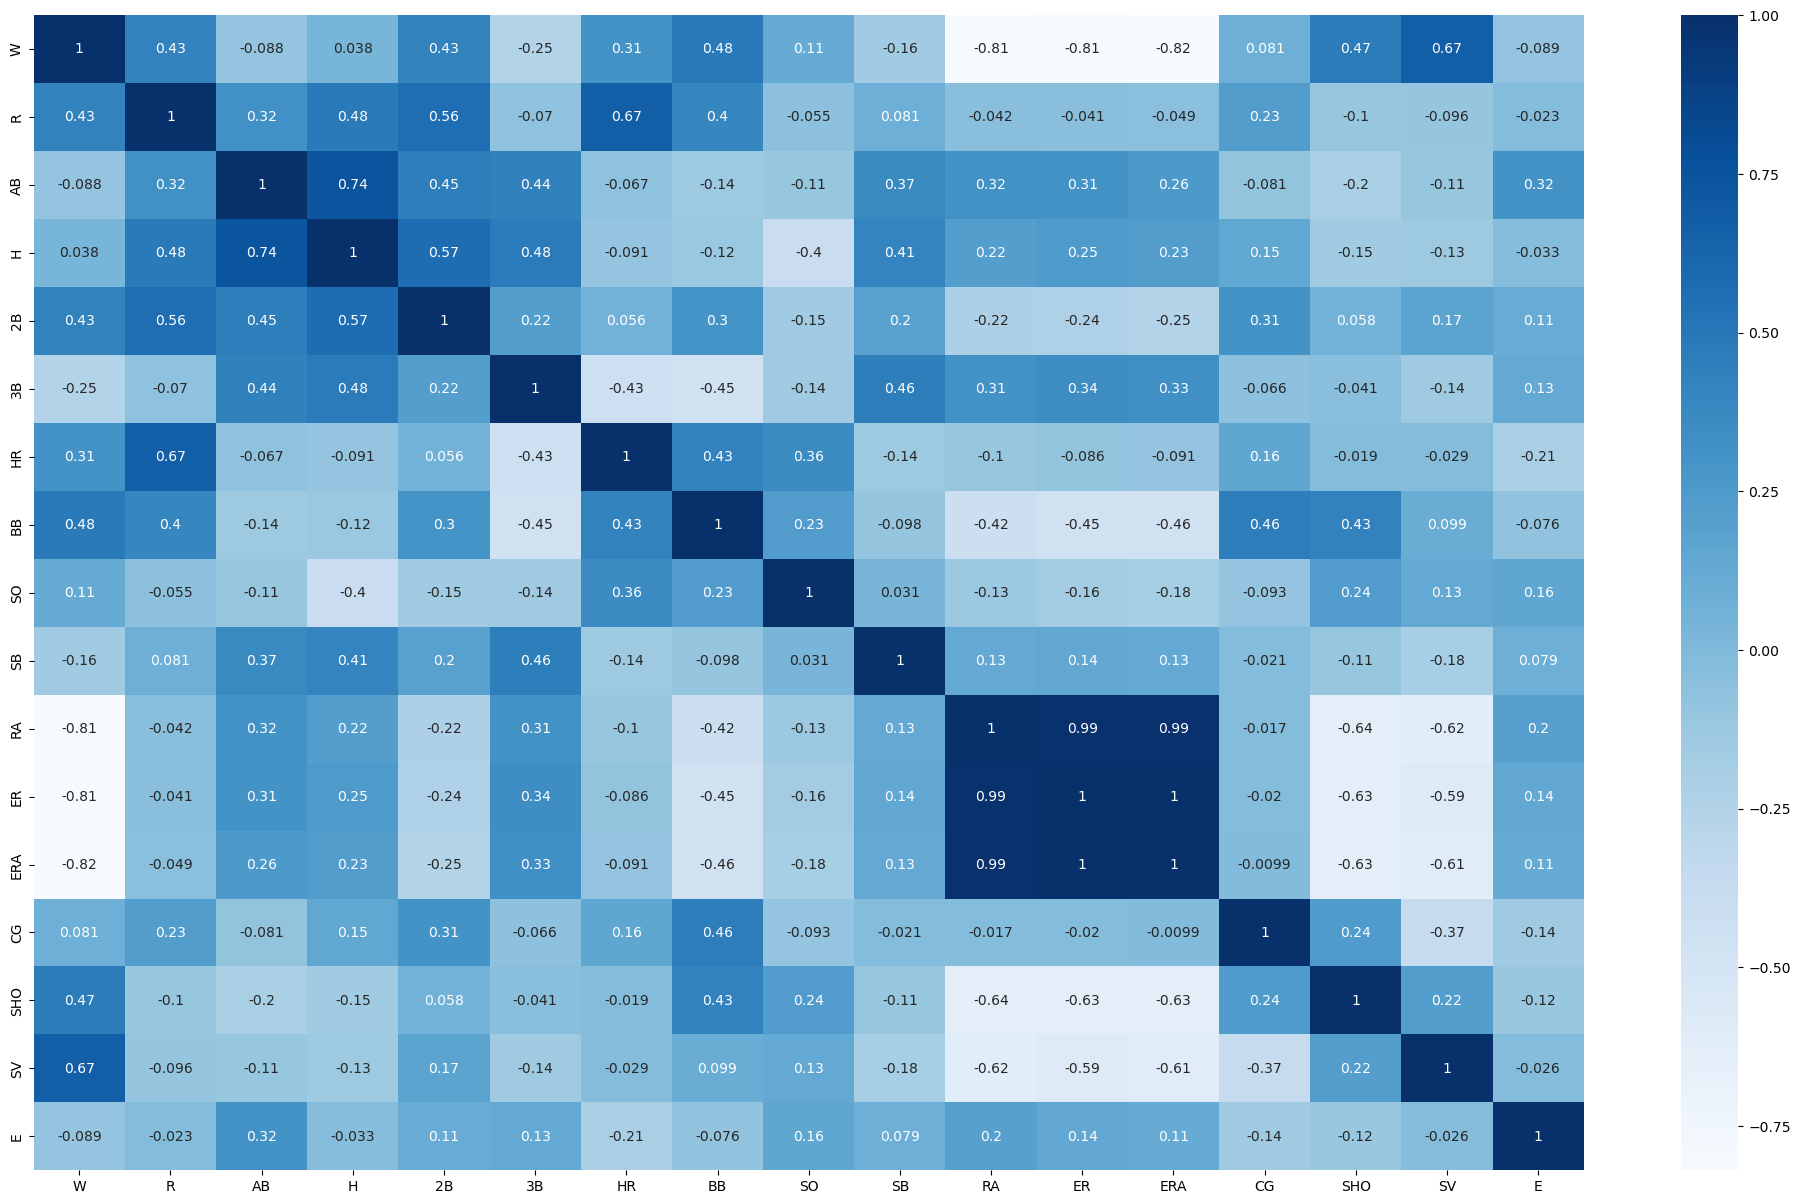

In [118]:
plt.figure(figsize=(25,15))
sns.heatmap(df.corr(),cmap='Blues',annot=True)
plt.show()

In [119]:
corr['W'].sort_values(ascending=True)

ERA   -0.819600
RA    -0.812952
ER    -0.809435
3B    -0.251118
SB    -0.157234
E     -0.089485
AB    -0.087947
H      0.037612
CG     0.080533
SO     0.111850
HR     0.307407
2B     0.427797
R      0.430751
SHO    0.471805
BB     0.484342
SV     0.666530
W      1.000000
Name: W, dtype: float64

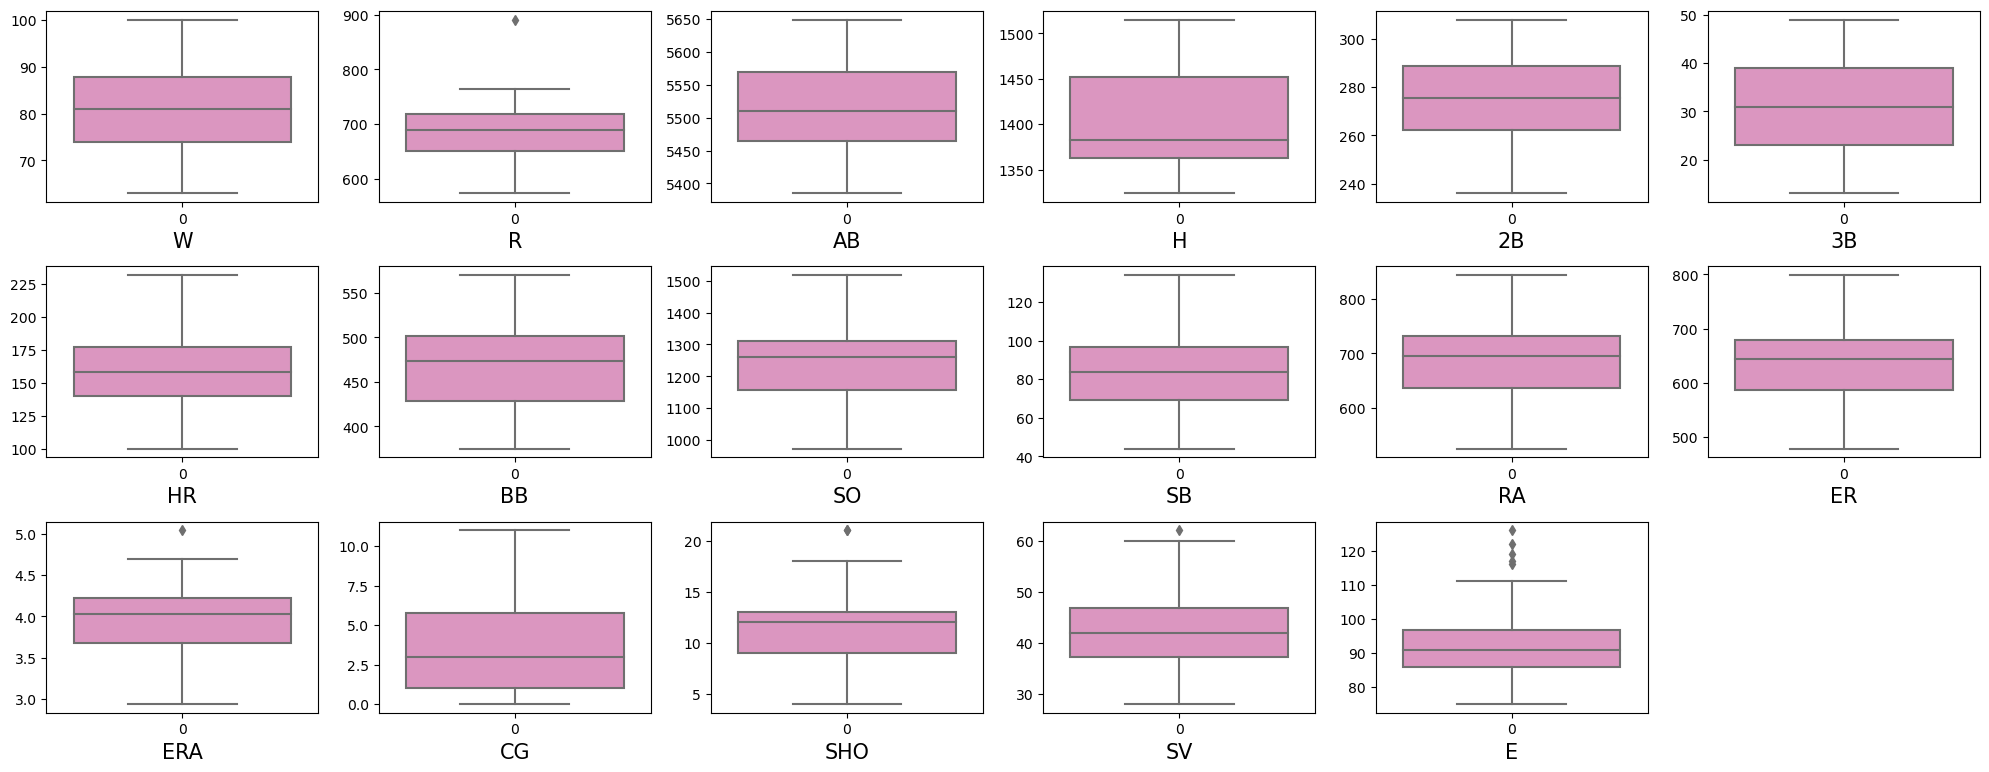

In [120]:
plt.figure(figsize=(20,15),facecolor='white')
plotnumber=1
for col in df:
    if plotnumber<=20:
        ax=plt.subplot(6,6,plotnumber)
        sns.boxplot(df[col],palette='Set2_r')
        plt.xlabel(col,fontsize=15)
        plt.yticks(rotation=0,fontsize = 10)
    plotnumber+=1
plt.tight_layout()

In [121]:
df.skew()

W      0.047089
R      1.200786
AB     0.183437
H      0.670254
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
RA     0.045734
ER     0.058710
ERA    0.053331
CG     0.736845
SHO    0.565790
SV     0.657524
E      0.890132
dtype: float64

In [122]:
df['R']=np.sqrt(df['R'])
df['ERA']=np.sqrt(df['ERA'])
df['SHO']=np.sqrt(df['SHO'])
df['E']=np.sqrt(df['E'])

In [123]:
df.skew()

W      0.047089
R      0.968676
AB     0.183437
H      0.670254
2B    -0.230650
3B     0.129502
HR     0.516441
BB     0.158498
SO    -0.156065
SB     0.479893
RA     0.045734
ER     0.058710
ERA   -0.133224
CG     0.736845
SHO   -0.061761
SV     0.657524
E      0.763487
dtype: float64

# spliting the data

In [124]:
x=df.drop('W',axis=1)
y=df['W']

# Feature Scaling using (Standard Scaler)

In [125]:
std=StandardScaler()
x=pd.DataFrame(std.fit_transform(x),columns=x.columns)
x

,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ER,ERA,CG,SHO,SV,E
0,0.643360,0.847731,1.663685,1.420173,1.041193,-0.787299,-1.534902,-2.697630,0.913883,-0.666234,-0.505110,-0.483823,-0.539806,-0.781873,1.671607,-0.445160
1,0.157187,-0.711094,-0.970681,0.127403,1.235809,-0.243967,-0.536592,0.154878,-0.601826,0.165971,0.248930,0.280051,-0.539806,0.259567,0.249879,-0.600540
2,-0.320974,-1.115233,-0.151891,1.588795,-0.223808,-0.723377,1.139144,-0.893982,0.111449,-0.680339,-0.751623,-0.622188,2.772641,-0.234918,-0.654856,-1.159123
3,-1.176953,0.241522,-0.401088,-0.828122,-0.418423,-0.883181,-1.160536,-0.168602,-0.690985,0.180076,0.103922,0.081058,1.300442,-0.500781,-0.784104,0.524463
4,0.034123,1.280738,1.984081,0.801892,1.722347,-0.403770,-0.251360,0.105866,-0.022290,1.618803,1.597501,1.492283,1.300442,0.259567,-1.042600,-0.600540
5,3.365868,-0.104884,1.361089,1.869832,-1.391501,2.185047,1.798742,-0.952796,0.200609,-0.257184,-0.389104,-0.323796,1.300442,-0.234918,-1.171848,-0.445160
6,1.321867,0.732263,-0.116292,-0.153633,-1.196885,1.545833,1.513510,-0.207812,-0.913883,0.137760,0.234429,0.191884,-0.171757,-2.139104,0.637623,-0.064265
7,0.453505,-0.451289,-0.596886,-1.615025,-1.099578,1.705636,-0.910958,0.811641,-1.760897,0.067235,0.147424,0.236022,-1.275906,-0.234918,-0.008617,-1.323223
8,-0.772397,-0.451289,-0.365489,0.183611,0.068115,0.107601,-0.590073,0.605790,0.156029,-0.652129,-0.461608,-0.460870,-0.907856,0.259567,2.188598,0.085217
9,1.052647,1.785913,1.628086,1.082929,0.165423,-0.084163,0.158660,-0.982204,-0.557246,0.913544,0.843461,0.800192,-0.171757,-0.234918,-0.396360,0.233135


here we have scaled the data using Standard Scalerization to overcome the issue of biasness

# Checking variance inflation factor

In [126]:
vif=pd.DataFrame()
vif['variables']=x.columns
vif['VIF VALUES']=[variance_inflation_factor(x.values,i)for i in range(len(x.columns))]
vif

,variables,VIF VALUES
0,R,14.721075
1,AB,7.401735
2,H,9.545280
3,2B,3.827959
4,3B,3.494297
5,HR,11.616029
6,BB,3.943921
7,SO,2.716548
8,SB,1.875818
9,RA,178.569501


as we can see in this vif values 'ER' feature is giving high value than the other feature it means this feature is highly correleted with the other features that,s why we have to drop this feature
for resolving the multicolinearity issue

In [127]:
x=x.drop('ER',axis=1)
x.head()

,R,AB,H,2B,3B,HR,BB,SO,SB,RA,ERA,CG,SHO,SV,E
0,0.643360,0.847731,1.663685,1.420173,1.041193,-0.787299,-1.534902,-2.697630,0.913883,-0.666234,-0.483823,-0.539806,-0.781873,1.671607,-0.445160
1,0.157187,-0.711094,-0.970681,0.127403,1.235809,-0.243967,-0.536592,0.154878,-0.601826,0.165971,0.280051,-0.539806,0.259567,0.249879,-0.600540
2,-0.320974,-1.115233,-0.151891,1.588795,-0.223808,-0.723377,1.139144,-0.893982,0.111449,-0.680339,-0.622188,2.772641,-0.234918,-0.654856,-1.159123
3,-1.176953,0.241522,-0.401088,-0.828122,-0.418423,-0.883181,-1.160536,-0.168602,-0.690985,0.180076,0.081058,1.300442,-0.500781,-0.784104,0.524463
4,0.034123,1.280738,1.984081,0.801892,1.722347,-0.403770,-0.251360,0.105866,-0.022290,1.618803,1.492283,1.300442,0.259567,-1.042600,-0.600540


here we have droped the 'ER' feature again checking the vif value

In [128]:
vif=pd.DataFrame()
vif['variables']=x.columns
vif['VIF VALUES']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif

,variables,VIF VALUES
0,R,10.962211
1,AB,5.031043
2,H,8.657110
3,2B,3.806083
4,3B,2.979707
5,HR,8.459775
6,BB,3.780366
7,SO,2.689819
8,SB,1.874240
9,RA,115.965260


here 'RA' feature vif values is high again we have to droped this feature to overcome the issue of biassness

In [129]:
x=x.drop('ERA',axis=1)

In [130]:
vif=pd.DataFrame()
vif['variables']=x.columns
vif['VIF VALUES']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif

,variables,VIF VALUES
0,R,10.961615
1,AB,4.279746
2,H,8.472102
3,2B,3.541482
4,3B,2.872692
5,HR,7.769463
6,BB,3.343179
7,SO,2.137843
8,SB,1.824410
9,RA,5.025918


here we can consider our threshold value is 10 

# modeling

In [131]:
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    rfr=RandomForestRegressor()
    rfr.fit(x_train,y_train)
    rfr_pred=rfr.predict(x_test)
    acc=r2_score(y_test,rfr_pred)
    if acc>maxAccu:
        maxAccu = acc
        maxRS = i
print('Best accuracy is',maxAccu,'at random_state is ',maxRS)


Best accuracy is 0.8287088461538461 at random_state is  163


# creating train test split

In [132]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=maxRS)

# Linear Regression

In [133]:
lr=LinearRegression()
lr.fit(x_train,y_train)
lr_pred=lr.predict(x_test)
lr_train=lr.predict(x_train)
print('r2_score on train data',r2_score(y_train,lr_train))
print('r2_score on test data',r2_score(y_test,lr_pred))
print('mean squared error',mean_squared_error(y_test,lr_pred))
print('mean absolute error',mean_absolute_error(y_test,lr_pred))
print('sqrt mean squared error',np.sqrt(mean_squared_error(y_test,lr_pred)))

r2_score on train data 0.9540135986440541
r2_score on test data 0.6039454401248041
mean squared error 22.88315234834466
mean absolute error 4.145372453372829
sqrt mean squared error 4.783633801655877


# Decision Tree Regressor

In [134]:
dtc=DecisionTreeRegressor()
dtc.fit(x_train,y_train)
dtc_pred=dtc.predict(x_test)
dtc_train=dtc.predict(x_train)
print('r2_score on train data',r2_score(y_train,dtc_train))
print('r2_score on test data',r2_score(y_test,dtc_pred))
print('mean squared error',mean_squared_error(y_test,dtc_pred))
print('mean absolute error',mean_absolute_error(y_test,dtc_pred))
print('sqrt mean squared error',np.sqrt(mean_squared_error(y_test,dtc_pred)))

r2_score on train data 1.0
r2_score on test data -0.08846153846153815
mean squared error 62.888888888888886
mean absolute error 7.333333333333333
sqrt mean squared error 7.930251502246879


# KNeighbors Regressor

In [135]:
knn=KNeighborsRegressor()
knn.fit(x_train,y_train)
knn_pred=knn.predict(x_test)
knn_train=knn.predict(x_train)
print('r2_score on train data',r2_score(y_train,knn_train))
print('r2_score on test data',r2_score(y_test,knn_pred))
print('mean squared error',mean_squared_error(y_test,knn_pred))
print('mean absolute error',mean_absolute_error(y_test,knn_pred))
print('sqrt mean squared error',np.sqrt(mean_squared_error(y_test,knn_pred)))

r2_score on train data 0.6454187689202826
r2_score on test data 0.7033076923076924
mean squared error 17.142222222222216
mean absolute error 3.622222222222222
sqrt mean squared error 4.14031668139313


# SVR (Support Vector Regressor)

In [136]:
svr=SVR()
svr.fit(x_train,y_train)
svr_pred=svr.predict(x_test)
svr_train=svr.predict(x_train)
print('r2_score on train data',r2_score(y_train,svr_train))
print('r2_score on test data',r2_score(y_test,svr_pred))
print('mean squared error',mean_squared_error(y_test,svr_pred))
print('mean absolute error',mean_absolute_error(y_test,svr_pred))
print('sqrt mean_squared_error',np.sqrt(mean_squared_error(y_test,svr_pred)))

r2_score on train data 0.18625384557961533
r2_score on test data 0.16209630818387932
mean squared error 48.41221330493143
mean absolute error 6.2854929570056095
sqrt mean_squared_error 6.957888566579047


# Random Forest Regressor

In [137]:
rfr=RandomForestRegressor()
rfr.fit(x_train,y_train)
rfr_pred=rfr.predict(x_test)
rfr_train=rfr.predict(x_train)
print('r2_score on train data',r2_score(y_train,rfr_train))
print('r2_score on test data',r2_score(y_test,rfr_pred))
print('mean squared error',mean_squared_error(y_test,rfr_pred))
print('mean absolute error',mean_absolute_error(y_test,rfr_pred))
print('sqrt mean_squared_error',np.sqrt(mean_squared_error(y_test,rfr_pred)))

r2_score on train data 0.9184584636730575
r2_score on test data 0.8977515384615388
mean squared error 5.907688888888874
mean absolute error 2.0799999999999965
sqrt mean_squared_error 2.430573777709468


# Extra Trees Regressor

In [138]:
etr=ExtraTreesRegressor()
etr.fit(x_train,y_train)
etr_pred=etr.predict(x_test)
etr_train=etr.predict(x_train)
print('r2_score on train data',r2_score(y_train,etr_train))
print('r2_score on test data',r2_score(y_test,etr_pred))
print('mean squared error',mean_squared_error(y_test,etr_pred))
print('mean absolute error',mean_absolute_error(y_test,etr_pred))
print('sqrt mean_squared_error',np.sqrt(mean_squared_error(y_test,etr_pred)))

r2_score on train data 1.0
r2_score on test data 0.882140576923077
mean squared error 6.809655555555552
mean absolute error 2.158888888888888
sqrt mean_squared_error 2.609531673606502


# Ada Boost Regressor

In [139]:
abr=AdaBoostRegressor()
abr.fit(x_train,y_train)
abr_pred=abr.predict(x_test)
abr_train=abr.predict(x_train)
print('r2_score on train data',r2_score(y_train,abr_train))
print('r2_score on test data',r2_score(y_test,abr_pred))
print('mean squared error',mean_squared_error(y_test,abr_pred))
print('mean absolute error',mean_absolute_error(y_test,abr_pred))
print('sqrt mean squared error',np.sqrt(mean_squared_error(y_test,abr_pred)))

r2_score on train data 0.9916697664181717
r2_score on test data 0.7227222222222225
mean squared error 16.020493827160486
mean absolute error 3.5703703703703695
sqrt mean squared error 4.002560908613445


# Gradient Boosting Regressor

In [140]:
gbr=GradientBoostingRegressor()
gbr.fit(x_train,y_train)
gbr_pred=gbr.predict(x_test)
gbr_train=gbr.predict(x_train)
print('r2_score on train data',r2_score(y_train,gbr_train))
print('r2_score on test data',r2_score(y_test,gbr_pred))
print('mean squared error',mean_squared_error(y_test,gbr_pred))
print('mean absolute eror',mean_absolute_error(y_test,gbr_pred))
print('sqrt mean squared error',np.sqrt(mean_squared_error(y_test,gbr_pred)))

r2_score on train data 0.9999998708620962
r2_score on test data 0.33999318868861383
mean squared error 38.133726875768986
mean absolute eror 4.844248033466117
sqrt mean squared error 6.17525115892212


# Lasso Regression

In [141]:
ls=Lasso()
ls.fit(x_train,y_train)
ls_pred=ls.predict(x_test)
ls_train=ls.predict(x_train)
print('r2_score on train data',r2_score(y_train,ls_train))
print('r2_score on test data',r2_score(y_test,ls_pred))
print('mean_squared_error',mean_squared_error(y_test,ls_pred))
print('mean_absolute_error',mean_absolute_error(y_test,ls_pred))
print('sqrt mean_squared_error',np.sqrt(mean_squared_error(y_test,ls_pred)))

r2_score on train data 0.8772310071285887
r2_score on test data 0.9428114811041003
mean_squared_error 3.3042255362075377
mean_absolute_error 1.5653887993016977
sqrt mean_squared_error 1.8177528809515164


# Ridge  Regression

In [142]:
rdg=Ridge()
rdg.fit(x_train,y_train)
rdg_pred=rdg.predict(x_test)
rdg_train=rdg.predict(x_train)
print('r2_score on train data',r2_score(y_train,rdg_train))
print('r2_score on test data',r2_score(y_test,rdg_pred))
print('mean squared error',mean_squared_error(y_test,rdg_pred))
print('mean absolute error',mean_absolute_error(y_test,rdg_pred))
print('sqrt mean squared error',np.sqrt(mean_squared_error(y_test,rdg_pred)))

r2_score on train data 0.9363648107386209
r2_score on test data 0.8246995857895054
mean squared error 10.128468376606357
mean absolute error 2.838109780950125
sqrt mean squared error 3.182525471478014


# ElasticNet Regression

In [143]:
elstc=ElasticNet()
elstc.fit(x_train,y_train)
elstc_pred=elstc.predict(x_test)
elstc_train=elstc.predict(x_train)
print('r2_score on train data',r2_score(y_train,elstc_train))
print('r2_score on test data',r2_score(y_test,elstc_pred))
print('mean squared error',mean_squared_error(y_test,elstc_pred))
print('mean absolute error',mean_absolute_error(y_test,elstc_pred))
print('sqrt mean squared error',np.sqrt(mean_squared_error(y_test,elstc_pred)))

r2_score on train data 0.8317393067110178
r2_score on test data 0.9232276928827522
mean squared error 4.4357333001076515
mean absolute error 1.8378194168462112
sqrt mean squared error 2.106118064142571


# Cross Validation Score

In [144]:
score1=cross_val_score(lr,x,y,cv=5,scoring='r2')
print(score1)
print(score1.mean())
print('difference between the cross validation score and the r2_score',(r2_score(y_test,lr_pred)-score1.mean()*100))

[ 0.64463459 -0.84470585  0.50819815  0.62929641  0.7140739 ]
0.3302994408075802
difference between the cross validation score and the r2_score -32.42599864063322


In [145]:
score2=cross_val_score(dtc,x,y)
print(score2)
print(score2.mean())
print('difference between the cross validation score and the r2_score',(r2_score(y_test,dtc_pred)-score2.mean()))

[  0.02220249 -10.12977099  -0.39146992  -0.2188383    0.42840237]
-2.0578948719197965
difference between the cross validation score and the r2_score 1.9694333334582583


In [146]:
score3=cross_val_score(knn,x,y)
print(score3)
print(score3.mean())
print('difference between the cross validation score and the r2 score',(r2_score(y_test,knn_pred)-score3.mean()*100))

[ 0.21072824 -2.71541985  0.19098248  0.32920565  0.68650888]
-0.25959891913410216
difference between the cross validation score and the r2 score 26.66319960571791


In [147]:
score4=cross_val_score(svr,x,y)
print(score4)
print(score4.mean())
print('difference between the cross validation score and the r2_score',(r2_score(y_test,svr_pred)-score4.mean()*100))

[-0.152415   -0.80991812 -0.28651511 -0.6224999  -0.05540425]
-0.3853504774139027
difference between the cross validation score and the r2_score 38.69714404957415


In [148]:
score5=cross_val_score(rfr,x,y)
print(score5)
print(score5.mean())
print('difference between the cross validation score and the r2_score',(r2_score(y_test,rfr_pred)-score5.mean()*100))

[ 0.11450151 -4.45138244  0.2058166   0.46619328  0.79271828]
-0.5744305529503679
difference between the cross validation score and the r2_score 58.340806833498334


In [149]:
score6=cross_val_score(etr,x,y)
print(score6)
print(score6.mean())
print('difference between the cross validation score and the r2_score',(r2_score(y_test,etr_pred)-score6.mean()*100))

[-0.13548668 -3.33912557  0.34150149  0.39720835  0.78734793]
-0.38971089704722545
difference between the cross validation score and the r2_score 39.85323028164562


In [150]:
score7=cross_val_score(abr,x,y)
print(score7)
print(score7.mean())
print('difference between the cross validation score and the r2_score',(r2_score(y_test,abr_pred)-score7.mean()*100))

[ 0.35095872 -5.71758555  0.24736608  0.23001983  0.6377843 ]
-0.850291324428768
difference between the cross validation score and the r2_score 85.75185466509902


In [151]:
score8=cross_val_score(gbr,x,y)
print(score8)
print(score8.mean())
print('difference between the cross validation score and the r2_score',(r2_score(y_test,gbr_pred)-score8.mean()*100))

[ 0.13490168 -8.6062103   0.27140044  0.34314217  0.63138867]
-1.4450754682476972
difference between the cross validation score and the r2_score 144.84754001345834


In [152]:
score9=cross_val_score(ls,x,y)
print(score9)
print(score9.mean())
print('difference between the cross validation score and the r2_score',(r2_score(y_test,ls_pred)-score9.mean()*100))

[ 0.75820059 -0.58846947  0.6552189   0.65350545  0.92578741]
0.480848578197966
difference between the cross validation score and the r2_score -47.1420463386925


In [153]:
score10=cross_val_score(rdg,x,y)
print(score10)
print(score10.mean())
print('difference between the cross validation score and the r2_score',(r2_score(y_test,rdg_pred)-score10.mean()*100))

[ 0.65138952 -1.15911251  0.53152953  0.71281068  0.85282128]
0.31788769844851117
difference between the cross validation score and the r2_score -30.96407025906161


In [154]:
score11=cross_val_score(elstc,x,y)
print(score11)
print(score11.mean())
print('difference between the cross validation score and the r2_score',(r2_score(y_test,elstc_pred)-score11.mean()*100))

[ 0.53103506 -0.5890458   0.40971454  0.44947504  0.85386706]
0.331009176982281
difference between the cross validation score and the r2_score -32.17769000534535


# Hyper Parameter Tunning

In [155]:
param={'alpha':[0.0001,0.001,0.1,0.00001],
      'fit_intercept':[0.0001,0.001,1,0.001],
      'max_iter':[1000,2000,3000,4000],
      'tol':[0.0001,0.001,0.0001,0.001]}

model=Lasso()


In [156]:
grid=GridSearchCV(model,param)

In [157]:
grid.fit(x_train,y_train)

GridSearchCV(estimator=Lasso(),
             param_grid={'alpha': [0.0001, 0.001, 0.1, 1e-05],
                         'fit_intercept': [0.0001, 0.001, 1, 0.001],
                         'max_iter': [1000, 2000, 3000, 4000],
                         'tol': [0.0001, 0.001, 0.0001, 0.001]})

In [158]:
grid.best_params_

{'alpha': 0.1, 'fit_intercept': 1, 'max_iter': 1000, 'tol': 0.001}

In [159]:
final_model=Lasso(alpha=0.001,fit_intercept=2,max_iter=2000,tol=0.00001)
final_model.fit(x_train,y_train)
final_pred=final_model.predict(x_test)
print('r2_score',r2_score(y_test,final_pred))
print('mean_squared_error',mean_squared_error(y_test,final_pred))
print('mean_absolute_error',mean_absolute_error(y_test,final_pred))
print('sqrt mean_squared_error',np.sqrt(mean_squared_error(y_test,final_pred)))

r2_score 0.6059725709695412
mean_squared_error 22.766029232870963
mean_absolute_error 4.139456910988077
sqrt mean_squared_error 4.771376031384548


In [160]:
Final_model=Lasso(alpha=0.1,fit_intercept=1,max_iter=1000,tol=0.001)
Final_model.fit(x_train,y_train)
Final_pred=Final_model.predict(x_test)
print('r2_score',r2_score(y_test,Final_pred))
print('mean_squared_error',mean_squared_error(y_test,final_pred))
print('mean_absolute_error',mean_absolute_error(y_test,final_pred))
print('sqrt mean_squared_error',np.sqrt(mean_squared_error(y_test,final_pred)))


r2_score 0.8080791202603743
mean_squared_error 22.766029232870963
mean_absolute_error 4.139456910988077
sqrt mean_squared_error 4.771376031384548


In [161]:
best_model=Lasso()
best_model.fit(x_train,y_train)
best_pred=best_model.predict(x_test)
print('r2_score',r2_score(y_test,best_pred))
print('mean_squared_error',mean_squared_error(y_test,best_pred))
print('mean_absolute_error',mean_absolute_error(y_test,best_pred))
print('sqrt mean_squared_error',np.sqrt(mean_squared_error(y_test,best_pred)))

r2_score 0.9428114811041003
mean_squared_error 3.3042255362075377
mean_absolute_error 1.5653887993016977
sqrt mean_squared_error 1.8177528809515164


here we have selected the Lasso Regression because it is giving high positive r2_score performance after the cross validation score

# Save the model

In [162]:
import joblib


In [163]:
joblib.dump(best_model,'baseball_prediction.pkl')

['baseball_prediction.pkl']

In [164]:
result=joblib.load('baseball_prediction.pkl')

In [165]:
output=result.predict(x_test)

In [166]:
output

array([88.79646674, 77.49226637, 74.13838883, 87.50606447, 88.48731107,
       79.27075614, 70.46589271, 87.69330966, 85.80559882])

In [167]:
a=np.array(y_test)
df=pd.DataFrame()
df['predicted']=output
df['original']=a
df

,predicted,original
0,88.796467,90
1,77.492266,76
2,74.138389,74
3,87.506064,86
4,88.487311,92
5,79.270756,78
6,70.465893,68
7,87.693310,87
8,85.805599,84
